# Utility functions and tests (to be integrated w/ source code)


In [1]:
import fileinput
import json
import os
import re
import shutil
import sys

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import sympy as sy
import y0
from causalgraphicalmodels import CausalGraphicalModel
from IPython.display import Latex

import nocap

# you may need to fix  error w/ causalgraphicalmodels and new python versions
# change "from collections import Iterable" to "from collections.abc import Iterable" in cgm.py

# Path to the cgm.py file (update this to the correct path on your system)
# cgm_file_path = "/path/to/causalgraphicalmodels/cgm.py"

# shutil.copyfile(cgm_file_path, cgm_file_path + ".bak")  # Create a backup of the original file

# Replace the import statement
# with fileinput.FileInput(cgm_file_path, inplace=True) as file:
#     for line in file:
#         print(line.replace("from collections import Iterable", "from collections.abc import Iterable"), end='')

### parse a biocyc network regulation text file and convert it into a networkx directed graph

In [2]:
import utility 



### convert cyclic directed graph into acyclic directed graph

In [3]:
# def convert_to_acyclic_graph(graph):
#     """Converts a (cyclic) directed graph into an acyclic directed graph by removing edges and disconnected nodes."""
#     G = graph.copy()

#     # Remove self-loops
#     self_loops = list(nx.selfloop_edges(G))
#     G.remove_edges_from(self_loops)

#     # Remove nodes that became disconnected after removing self-loops
#     for u, v in self_loops:
#         if G.degree(u) == 0:
#             G.remove_node(u)

#     # If the graph is still cyclic, find and break the cycles
#     if not nx.is_directed_acyclic_graph(G):
#         cycles = list(nx.simple_cycles(G))
#         for cycle in cycles:
#             # Remove one edge from the cycle
#             G.remove_edge(cycle[-1], cycle[0])
#             # Remove nodes that became disconnected after removing the edge
#             if G.degree(cycle[-1]) == 0:
#                 G.remove_node(cycle[-1])
#             if G.degree(cycle[0]) == 0:
#                 G.remove_node(cycle[0])

#     return G


# def test_convert_to_acyclic_graph():
#     """Tests if a graph is correctly converted into an acyclic graph."""
#     # Create a directed graph representing a simple gene regulatory network
#     cyclic_graph = nx.DiGraph()
#     cyclic_graph.add_edges_from(
#         [
#             ("Gene1", "Gene2"),  # Gene1 activates Gene2
#             ("Gene2", "Gene3"),  # Gene2 activates Gene3
#             ("Gene3", "Gene1"),  # Gene3 activates Gene1, forming a cycle
#             ("Gene3", "Gene3"),  # Gene3 regulates itself, a self-loop
#             ("Gene4", "Gene2"),  # Gene4 activates Gene2, not part of a cycle
#         ]
#     )

#     # Convert the cyclic graph to an acyclic one
#     acyclic_graph = convert_to_acyclic_graph(cyclic_graph)

#     # Test if the resulting graph is acyclic
#     assert nx.is_directed_acyclic_graph(acyclic_graph), "The graph is not acyclic."

#     # Test if the self-loop has been removed
#     assert not acyclic_graph.has_edge("Gene3", "Gene3"), "The self-loop has not been removed."

#     # Test if the larger cycle has been broken by checking for cycles
#     assert len(list(nx.simple_cycles(acyclic_graph))) == 0, "The cycle has not been broken."

#     # Test if non-cycle edges are preserved
#     assert acyclic_graph.has_edge(
#         "Gene4", "Gene2"
#     ), "The edge not part of a cycle was incorrectly removed."
#     print("test_convert_to_acyclic_graph test passed.")


# test_convert_to_acyclic_graph()

In [4]:
# def convert_to_acyclic_graph_dfs(graph):
#     """Converts a (cyclic) directed graph into an acyclic directed graph using depth-first search to remove back edges."""
#     G = graph.copy()

#     # Remove self-loops
#     G.remove_edges_from(nx.selfloop_edges(G))

#     dfs_edges = list(nx.dfs_edges(G))
#     back_edges = set(G.edges()) - set(dfs_edges)
#     G.remove_edges_from(back_edges)

#     # Keep only the largest strongly connected component
#     largest_scc = max(nx.strongly_connected_components(G), key=len)
#     for node in set(G.nodes()) - largest_scc:
#         G.remove_node(node)

#     return G


# def test_convert_to_acyclic_graph_dfs():
#     """Tests if a graph is correctly converted into an acyclic graph using depth-first search."""
#     # Create a directed graph representing a simple gene regulatory network
#     cyclic_graph = nx.DiGraph()
#     cyclic_graph.add_edges_from(
#         [
#             ("Gene1", "Gene2"),
#             ("Gene2", "Gene3"),
#             ("Gene3", "Gene1"),  # Cycle
#             ("Gene3", "Gene3"),  # Self-loop
#             ("Gene4", "Gene2"),  # Not part of a cycle
#         ]
#     )

#     # Convert the cyclic graph to an acyclic one using depth-first search
#     acyclic_graph_dfs = convert_to_acyclic_graph_dfs(cyclic_graph)

#     # Test if the resulting graph is acyclic
#     assert nx.is_directed_acyclic_graph(acyclic_graph_dfs), "The graph is not acyclic."

#     # Test if the resulting graph has no self-loops
#     assert not list(nx.selfloop_edges(acyclic_graph_dfs)), "The graph has self-loops."

#     # Test if the resulting graph is strongly connected
#     assert nx.is_strongly_connected(acyclic_graph_dfs), "The graph is not strongly connected."

#     # Test case 2: Graph with multiple separate cycles
#     cyclic_graph2 = nx.DiGraph()
#     cyclic_graph2.add_edges_from(
#         [
#             ("Gene1", "Gene2"),
#             ("Gene2", "Gene1"),  # Cycle 1
#             ("Gene3", "Gene4"),
#             ("Gene4", "Gene3"),  # Cycle 2
#         ]
#     )
#     acyclic_graph2 = convert_to_acyclic_graph(cyclic_graph2)
#     assert nx.is_directed_acyclic_graph(acyclic_graph2), "The graph is not acyclic."

#     # Test case 3: Graph with nested cycles
#     cyclic_graph3 = nx.DiGraph()
#     cyclic_graph3.add_edges_from(
#         [
#             ("Gene1", "Gene2"),
#             ("Gene2", "Gene3"),
#             ("Gene3", "Gene1"),  # Outer cycle
#             ("Gene2", "Gene4"),
#             ("Gene4", "Gene2"),  # Inner cycle
#         ]
#     )
#     acyclic_graph3 = convert_to_acyclic_graph(cyclic_graph3)
#     assert nx.is_directed_acyclic_graph(acyclic_graph3), "The graph is not acyclic."

#     # Test case 4: Graph with a single node
#     cyclic_graph4 = nx.DiGraph()
#     cyclic_graph4.add_node("Gene1")
#     acyclic_graph4 = convert_to_acyclic_graph(cyclic_graph4)
#     assert nx.is_directed_acyclic_graph(acyclic_graph4), "The graph is not acyclic."

#     print("All assertions passed for convert_to_acyclic_graph.")


# # Run the test function
# test_convert_to_acyclic_graph()


# test_convert_to_acyclic_graph_dfs()

In [5]:
# def convert_to_acyclic_graph_fancy(graph, target_node):
#     """Converts a (cyclic) directed graph into an acyclic directed graph by removing edges and disconnected nodes."""
#     G = graph.copy()

#     # Get all descendants of the target node
#     descendants = nx.descendants(G, target_node)

#     # Find all edges in shortest paths from the target node to its descendants
#     edges_in_paths = set()
#     for descendant in descendants:
#         path = nx.shortest_path(G, target_node, descendant)
#         edges_in_path = list(zip(path, path[1:]))
#         edges_in_paths.update(edges_in_path)

#     # Remove self-loops
#     self_loops = list(nx.selfloop_edges(G))
#     G.remove_edges_from(self_loops)

#     # Remove nodes that became disconnected after removing self-loops
#     for u, v in self_loops:
#         if G.degree(u) == 0:
#             G.remove_node(u)

#     # While the graph is cyclic, find and break the cycles
#     while not nx.is_directed_acyclic_graph(G):
#         try:
#             cycle_edges = nx.find_cycle(G, orientation="original")
#         except nx.exception.NetworkXNoCycle:
#             break  # No cycle found.

#         # Remove an edge from the cycle that's not part of a path from the target node to a descendant
#         for u, v, _ in cycle_edges:
#             if (u, v) not in edges_in_paths:
#                 G.remove_edge(u, v)

#                 # Remove nodes that became disconnected after removing the edge
#                 if G.degree(u) == 0:
#                     G.remove_node(u)
#                 if G.degree(v) == 0:
#                     G.remove_node(v)
#                 break  # Break the cycle processing loop once an edge has been removed

#     return G


# def test_convert_to_acyclic_graph_fancy():
#     # Create a directed graph representing a simple gene regulatory network
#     cyclic_graph = nx.DiGraph()
#     cyclic_graph.add_edges_from(
#         [
#             ("Gene1", "Gene2"),  # Gene1 activates Gene2
#             ("Gene2", "Gene3"),  # Gene2 activates Gene3
#             ("Gene3", "Gene1"),  # Gene3 activates Gene1, forming a cycle
#             ("Gene3", "Gene3"),  # Gene3 regulates itself, a self-loop
#             ("Gene4", "Gene2"),  # Gene4 activates Gene2, not part of a cycle
#         ]
#     )

#     # Convert the cyclic graph to an acyclic one
#     acyclic_graph = convert_to_acyclic_graph_fancy(cyclic_graph, "Gene1")

#     # Test if the resulting graph is acyclic
#     assert nx.is_directed_acyclic_graph(acyclic_graph), "The graph is not acyclic."

#     # Test if the self-loop has been removed
#     assert not acyclic_graph.has_edge("Gene3", "Gene3"), "The self-loop has not been removed."

#     # Test if the larger cycle has been broken by checking for cycles
#     assert len(list(nx.simple_cycles(acyclic_graph))) == 0, "The cycle has not been broken."

#     # Test if non-cycle edges are preserved
#     assert acyclic_graph.has_edge(
#         "Gene4", "Gene2"
#     ), "The edge not part of a cycle was incorrectly removed."

#     # Test if edges of the target node and its descendants are preserved
#     assert acyclic_graph.has_edge(
#         "Gene1", "Gene2"
#     ), "The edge of the target node was incorrectly removed."
#     assert acyclic_graph.has_edge(
#         "Gene2", "Gene3"
#     ), "The edge of a descendant of the target node was incorrectly removed."

#     print("test_convert_to_acyclic_graph_fancy passed")


# test_convert_to_acyclic_graph_fancy()

### Additional graph methods

In [6]:
# def draw_network(G):
#     pos = nx.spring_layout(G)  # Position nodes using Fruchterman-Reingold force-directed algorithm
#     nx.draw(G, pos, with_labels=True, node_size=2, node_color="lightblue", edge_color="gray")
#     edge_labels = nx.get_edge_attributes(G, "polarity")
#     nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
#     plt.show()


# # def get_subgraph_from_nodes(G, node_list, descendants_only=False):
# #     # Initialize a set for all the nodes in the subgraph
# #     subgraph_nodes = set()

# #     # For each node in the list, find all descendants and ancestors
# #     for node in node_list:
# #         if node in G:
# #             subgraph_nodes.add(node)  # add single element
# #             descendants = nx.descendants(G, node)
# #             if len(descendants) == 1:
# #                 subgraph_nodes.add(descendants)
# #             else:
# #                 subgraph_nodes.update(descendants)
# #             if not descendants_only:
# #                 for desc in descendants:
# #                     ancestors = nx.ancestors(G, desc)
# #                     if len(ancestors) == 1:
# #                         subgraph_nodes.add(ancestors)
# #                     else:
# #                         subgraph_nodes.update(ancestors)
# #         else:
# #             print(f'{node} not found in graph.')

# #     # Create the subgraph from the full graph using the nodes in the set
# #     subgraph = G.subgraph(subgraph_nodes)
# #     return subgraph


# def get_subgraph_from_nodes(G, node_list, descendants_only=False):
#     # Initialize a set for all the nodes in the subgraph
#     subgraph_nodes = set()

#     # For each node in the list, find all descendants
#     for node in node_list:
#         if node in G:
#             subgraph_nodes.add(node)
#             descendants = nx.descendants(G, node)
#             subgraph_nodes.update(descendants)
#             if not descendants_only:
#                 # For each descendant, add its ancestors
#                 for desc in descendants:
#                     ancestors = nx.ancestors(G, desc)
#                     subgraph_nodes.update(ancestors)
#         else:
#             print(f"{node} not found in graph.")

#     # Create the subgraph from the full graph using the nodes in the set
#     subgraph = G.subgraph(subgraph_nodes)
#     return subgraph


# def test_get_subgraph_from_nodes_include_ancestors_of_descendants():
#     # Create a sample directed acyclic graph (DAG)
#     G = nx.DiGraph()
#     G.add_edges_from(
#         [
#             ("A", "B"),  # A is an ancestor of B
#             ("B", "C"),  # B is an ancestor of C and a descendant of A
#             ("C", "D"),  # C is an ancestor of D
#             ("D", "E"),  # D is an ancestor of E
#         ]
#     )

#     # Node list containing a single node
#     node_list = ["B"]

#     # Call the function to get a subgraph including descendants and their ancestors
#     subgraph = get_subgraph_from_nodes(G, node_list, descendants_only=False)

#     # Define the expected nodes in the subgraph, which should include the ancestors of descendants
#     expected_nodes = {
#         "A",
#         "B",
#         "C",
#         "D",
#         "E",
#     }  # A is an ancestor of B; B, C, D, and E are descendants

#     # Check if the actual nodes match the expected nodes
#     assert (
#         set(subgraph.nodes()) == expected_nodes
#     ), "The subgraph does not contain the correct nodes."

#     print(
#         "Test passed: The subgraph contains the correct nodes including ancestors of descendants."
#     )


# # Run the test
# test_get_subgraph_from_nodes_include_ancestors_of_descendants()


# def test_get_subgraph_from_nodes_complex_structure():
#     # Create a sample directed acyclic graph (DAG) with the specified structure
#     G = nx.DiGraph()
#     G.add_edges_from(
#         [
#             ("B", "C"),  # B is an ancestor of C
#             ("B", "D"),  # B is an ancestor of D
#             ("D", "E"),  # D is an ancestor of E
#             ("A", "E"),  # A is an ancestor of E
#         ]
#     )

#     # Node list containing a single node
#     node_list = ["B"]

#     # Call the function to get a subgraph including descendants and their ancestors
#     subgraph = get_subgraph_from_nodes(G, node_list, descendants_only=False)

#     # Define the expected nodes in the subgraph
#     # Since B is the starting node, we expect B, C, and D as descendants,
#     # and A as the ancestor of E (which is a descendant of D)
#     expected_nodes = {"B", "C", "D", "E", "A"}

#     # Check if the actual nodes match the expected nodes
#     assert (
#         set(subgraph.nodes()) == expected_nodes
#     ), "The subgraph does not contain the correct nodes."

#     print(
#         "Test passed: The subgraph contains the correct nodes including ancestors of descendants (complex)."
#     )


# # Run the test
# test_get_subgraph_from_nodes_complex_structure()


# def test_get_subgraph_from_nodes():
#     # Create a simple DAG for testing
#     dag = nx.DiGraph()
#     dag.add_edge("Gene1", "Gene2")
#     dag.add_edge("Gene1", "Gene3")
#     dag.add_edge("Gene2", "Gene4")
#     dag.add_edge("Gene3", "Gene4")
#     # Add an edge to create a single descendant scenario
#     dag.add_edge("Gene4", "Gene5")  # Gene4 has a single descendant Gene5

#     # Test getting the subgraph for a single node
#     subgraph = get_subgraph_from_nodes(dag, ["Gene1"])
#     assert set(subgraph.nodes) == {
#         "Gene1",
#         "Gene2",
#         "Gene3",
#         "Gene4",
#         "Gene5",
#     }, "Subgraph should contain all descendants of Gene1."

#     # Test getting the subgraph for a single node with descendants only
#     subgraph = get_subgraph_from_nodes(dag, ["Gene2"], descendants_only=True)
#     assert set(subgraph.nodes) == {
#         "Gene2",
#         "Gene4",
#         "Gene5",
#     }, "Subgraph should contain all descendants of Gene2."

#     # Test getting the subgraph for a single node with a single descendant
#     subgraph = get_subgraph_from_nodes(dag, ["Gene4"], descendants_only=True)
#     assert set(subgraph.nodes) == {
#         "Gene4",
#         "Gene5",
#     }, "Subgraph should contain the single descendant of Gene4."

#     # Test getting the subgraph for a node not in the graph
#     subgraph = get_subgraph_from_nodes(dag, ["Gene6"])
#     assert (
#         set(subgraph.nodes) == set()
#     ), "Subgraph should be empty when the node is not in the graph."

#     # Test getting the subgraph for multiple nodes
#     subgraph = get_subgraph_from_nodes(dag, ["Gene2", "Gene3"])
#     assert set(subgraph.nodes) == {
#         "Gene1",
#         "Gene2",
#         "Gene3",
#         "Gene4",
#         "Gene5",
#     }, "Subgraph should contain all descendants and ancestors of Gene2 and Gene3."

#     print("All assertions passed for get_subgraph_from_nodes.")


# # Run the unit test
# test_get_subgraph_from_nodes()

### generate a subnetwork from a target node, descendants, and all valid backdoor adjustment sets

In [7]:
# def generate_subnetwork_with_backdoor_adjustment(graph, target_gene):
#     # Create a new directed graph for the subnetwork
#     subnetwork = nx.DiGraph()

#     # Step 1: Identify the target gene and its descendants
#     descendants = nx.descendants(graph, target_gene)
#     # Include the target gene itself in the set
#     descendants.add(target_gene)
#     print(f"Descendants of {target_gene}: {descendants}")  # Debug print

#     # Step 2: Determine the backdoor adjustment set
#     # Convert the networkx graph to a CausalGraphicalModel
#     cgm = CausalGraphicalModel(nodes=list(graph.nodes), edges=[(u, v) for u, v in graph.edges])
#     # Get the backdoor adjustment set for the target gene
#     backdoor_adjustment_set = set()
#     for node in graph.nodes:
#         if node != target_gene:
#             for adjustment_set in cgm.get_all_backdoor_adjustment_sets(node, target_gene):
#                 backdoor_adjustment_set.update(adjustment_set)
#     print(f"Backdoor adjustment set for {target_gene}: {backdoor_adjustment_set}")  # Debug print

#     # Step 3: Construct the subnetwork
#     # Add nodes for the target gene, its descendants, and the backdoor adjustment set
#     subnetwork.add_nodes_from(descendants.union(backdoor_adjustment_set))
#     print(f"Nodes in the subnetwork: {set(subnetwork.nodes())}")  # Debug print

#     # Add edges between the nodes in the subnetwork that exist in the original graph
#     for u, v in graph.edges():
#         if u in subnetwork.nodes() and v in subnetwork.nodes():
#             subnetwork.add_edge(u, v, polarity=graph[u][v]["polarity"])

#     print(f"Edges in the subnetwork: {set(subnetwork.edges())}")  # Debug print

#     return subnetwork


# def test_generate_subnetwork_with_backdoor_adjustment():
#     # Test case 1: Simple graph with 1 target gene and 2 descendants, no backdoor paths
#     graph1 = nx.DiGraph()
#     graph1.add_edge("GeneM", "GeneT1", polarity="+")
#     graph1.add_edge("GeneM", "GeneT2", polarity="-")
#     subnetwork1 = generate_subnetwork_with_backdoor_adjustment(graph1, "GeneM")
#     assert set(subnetwork1.nodes()) == {"GeneM", "GeneT1", "GeneT2"}
#     assert set(subnetwork1.edges()) == {("GeneM", "GeneT1"), ("GeneM", "GeneT2")}

#     # Test case 2: More complex graph with 1 target gene, 2 descendants, and 1 backdoor path
#     graph2 = nx.DiGraph()
#     graph2.add_edge("GeneM", "GeneT1", polarity="+")
#     graph2.add_edge("GeneM", "GeneT2", polarity="-")
#     graph2.add_edge("GeneT1", "GeneT2", polarity="+")  # Backdoor path
#     subnetwork2 = generate_subnetwork_with_backdoor_adjustment(graph2, "GeneM")
#     assert set(subnetwork2.nodes()) == {"GeneM", "GeneT1", "GeneT2"}
#     assert set(subnetwork2.edges()) == {
#         ("GeneM", "GeneT1"),
#         ("GeneM", "GeneT2"),
#         ("GeneT1", "GeneT2"),
#     }

#     # Test case 3: Graph with 1 target gene, 3 descendants, and multiple backdoor paths
#     graph3 = nx.DiGraph()
#     graph3.add_edge("GeneM", "GeneT1", polarity="+")
#     graph3.add_edge("GeneM", "GeneT2", polarity="-")
#     graph3.add_edge("GeneT1", "GeneT3", polarity="+")  # Backdoor path
#     graph3.add_edge("GeneT2", "GeneT3", polarity="+")  # Another backdoor path
#     subnetwork3 = generate_subnetwork_with_backdoor_adjustment(graph3, "GeneM")
#     assert set(subnetwork3.nodes()) == {"GeneM", "GeneT1", "GeneT2", "GeneT3"}
#     assert set(subnetwork3.edges()) == {
#         ("GeneM", "GeneT1"),
#         ("GeneM", "GeneT2"),
#         ("GeneT1", "GeneT3"),
#         ("GeneT2", "GeneT3"),
#     }

#     # Test case 4: Single node graph
#     graph4 = nx.DiGraph()
#     graph4.add_node("GeneM")
#     subnetwork4 = generate_subnetwork_with_backdoor_adjustment(graph4, "GeneM")
#     assert set(subnetwork4.nodes()) == {"GeneM"}
#     assert set(subnetwork4.edges()) == set()

#     # Test case 5: Linear graph
#     graph5 = nx.DiGraph()
#     graph5.add_edge("GeneM", "GeneT1", polarity="+")
#     graph5.add_edge("GeneT1", "GeneT2", polarity="+")
#     subnetwork5 = generate_subnetwork_with_backdoor_adjustment(graph5, "GeneM")
#     assert set(subnetwork5.nodes()) == {"GeneM", "GeneT1", "GeneT2"}
#     assert set(subnetwork5.edges()) == {("GeneM", "GeneT1"), ("GeneT1", "GeneT2")}

#     # Test case 6: Diverging graph
#     graph6 = nx.DiGraph()
#     graph6.add_edge("GeneM", "GeneT1", polarity="+")
#     graph6.add_edge("GeneM", "GeneT2", polarity="+")
#     subnetwork6 = generate_subnetwork_with_backdoor_adjustment(graph6, "GeneM")
#     assert set(subnetwork6.nodes()) == {"GeneM", "GeneT1", "GeneT2"}
#     assert set(subnetwork6.edges()) == {("GeneM", "GeneT1"), ("GeneM", "GeneT2")}

#     # Test case 7: Converging graph
#     graph7 = nx.DiGraph()
#     graph7.add_edge("GeneT1", "GeneM", polarity="+")
#     graph7.add_edge("GeneT2", "GeneM", polarity="+")
#     subnetwork7 = generate_subnetwork_with_backdoor_adjustment(graph7, "GeneM")
#     assert set(subnetwork7.nodes()) == {"GeneM", "GeneT1", "GeneT2"}
#     assert set(subnetwork7.edges()) == {("GeneT1", "GeneM"), ("GeneT2", "GeneM")}

#     print("All assertions passed for generate_subnetwork_with_backdoor_adjustment.")


# # Run the test function
# test_generate_subnetwork_with_backdoor_adjustment()

### generate hill equations (non-linear model) from directed acyclic graph (DAG)
see: https://github.com/PNNL-CompBio/SERGIO/blob/501c569a3541ae16457bfad8b206af07c9c9bb44/SERGIO/sergio.py and https://doi.org/10.1016/j.cels.2020.08.003

In [8]:
# def generate_hill_equations(dag, activation_probability=0.5):
#     """
#     Generate symbolic Hill-like reaction dynamics equations for a gene regulatory network.
#     See:https://doi.org/10.1016/j.cels.2020.08.003
#     Note that basal rate = 0 for non master regulators, and production rate = basal rate for master regulators.

#     Args:
#     dag (nx.DiGraph): The directed acyclic graph representing the gene regulatory network.

#     Returns:
#     dict: Symbolic equations for the production rates of genes.
#     """
#     # Initialize a dictionary to hold the equations
#     equations = {}

#     # Define symbols for basal rates, maximum contributions, Hill coefficients, and half responses
#     basal_rates = {gene: sy.Symbol(f"b_{gene}") for gene in dag.nodes()}
#     max_contributions = {
#         (regulator, gene): sy.Symbol(f"K_{regulator}_{gene}") for regulator, gene in dag.edges()
#     }
#     hill_coefficients = {
#         (regulator, gene): sy.Symbol(f"n_{regulator}_{gene}") for regulator, gene in dag.edges()
#     }
#     half_responses = {
#         (regulator, gene): sy.Symbol(f"h_{regulator}_{gene}") for regulator, gene in dag.edges()
#     }

#     # Define gene expression symbols
#     gene_expressions = {gene: sy.Symbol(f"x_{gene}") for gene in dag.nodes()}

#     # Construct the equations for each gene
#     for gene in dag.nodes():
#         # If gene is a master regulator, its production rate is its basal rate (SERGIO assumption)
#         if dag.in_degree(gene) == 0:
#             equations[gene] = basal_rates[gene]
#             continue

#         # Sum contributions from each regulator using Hill functions
#         production_rate = basal_rates[gene]  # Start with the basal rate
#         for regulator in dag.predecessors(gene):
#             x = gene_expressions[regulator]
#             K = max_contributions[(regulator, gene)]
#             n = hill_coefficients[(regulator, gene)]
#             h = half_responses[(regulator, gene)]
#             polarity = dag[regulator][gene]["polarity"]

#             # double check these eqns
#             # k should be exported as negative if repressor
#             if polarity == "+":  # Activation
#                 pij = K * x**n / (h**n + x**n)
#             elif polarity == "-":  # Repression
#                 pij = K * (1 - x**n) / (h**n + x**n)
#             elif polarity == "+/-":  # Randomly assigned polarity based on user-defined probability
#                 if np.random.rand() < activation_probability:
#                     pij = K * x**n / (h**n + x**n)  # Activation
#                 else:
#                     pij = K * (1 - x**n) / (h**n + x**n)  # Repression
#             else:
#                 raise ValueError(f"Unknown polarity '{polarity}' for edge {regulator} -> {gene}")
#             production_rate += pij

#         equations[gene] = production_rate

#     return (
#         equations,
#         basal_rates,
#         max_contributions,
#         hill_coefficients,
#         half_responses,
#         gene_expressions,
#     )


# def test_generate_hill_equations():
#     # Define the activation probability for the test
#     activation_probability = 0.5

#     # Create a DAG for the test
#     test_dag = nx.DiGraph()
#     test_dag.add_edge("GeneA", "GeneB", polarity="+")
#     test_dag.add_edge("GeneC", "GeneB", polarity="-")
#     test_dag.add_edge("GeneD", "GeneB", polarity="+/-")  # Ambiguous polarity

#     # Set a fixed seed for numpy's random number generator for reproducibility
#     np.random.seed(42)

#     # Generate the Hill equations
#     (
#         hill_equations,
#         basal_rates,
#         max_contributions,
#         hill_coefficients,
#         half_responses,
#         gene_expressions,
#     ) = generate_hill_equations(test_dag, activation_probability=activation_probability)

#     np.random.seed(42)

#     # Define the expected equations explicitly
#     x_GeneA = gene_expressions["GeneA"]
#     x_GeneC = gene_expressions["GeneC"]
#     x_GeneD = gene_expressions["GeneD"]
#     b_GeneB = basal_rates["GeneB"]
#     K_GeneA_GeneB = max_contributions[("GeneA", "GeneB")]
#     K_GeneC_GeneB = max_contributions[("GeneC", "GeneB")]
#     K_GeneD_GeneB = max_contributions[("GeneD", "GeneB")]
#     n_GeneA_GeneB = hill_coefficients[("GeneA", "GeneB")]
#     n_GeneC_GeneB = hill_coefficients[("GeneC", "GeneB")]
#     n_GeneD_GeneB = hill_coefficients[("GeneD", "GeneB")]
#     h_GeneA_GeneB = half_responses[("GeneA", "GeneB")]
#     h_GeneC_GeneB = half_responses[("GeneC", "GeneB")]
#     h_GeneD_GeneB = half_responses[("GeneD", "GeneB")]

#     # Expected equation for GeneB, considering the polarities
#     expected_equation_GeneB = b_GeneB
#     expected_equation_GeneB += (
#         K_GeneA_GeneB
#         * x_GeneA**n_GeneA_GeneB
#         / (h_GeneA_GeneB**n_GeneA_GeneB + x_GeneA**n_GeneA_GeneB)
#     )  # Activation from GeneA
#     expected_equation_GeneB += (
#         K_GeneC_GeneB
#         * (1 - x_GeneC**n_GeneC_GeneB)
#         / (h_GeneC_GeneB**n_GeneC_GeneB + x_GeneC**n_GeneC_GeneB)
#     )  # Repression from GeneC
#     # For GeneD, we use the predetermined outcome of the random polarity based on the fixed seed
#     if np.random.rand() < activation_probability:
#         expected_equation_GeneB += (
#             K_GeneD_GeneB
#             * x_GeneD**n_GeneD_GeneB
#             / (h_GeneD_GeneB**n_GeneD_GeneB + x_GeneD**n_GeneD_GeneB)
#         )  # Activation from GeneD
#     else:
#         expected_equation_GeneB += (
#             K_GeneD_GeneB
#             * (1 - x_GeneD**n_GeneD_GeneB)
#             / (h_GeneD_GeneB**n_GeneD_GeneB + x_GeneD**n_GeneD_GeneB)
#         )  # Repression from GeneD

#     # Compare the actual and expected equations
#     assert (
#         sy.simplify(hill_equations["GeneB"] - expected_equation_GeneB) == 0
#     ), "Equation for GeneB does not match the expected equation."

#     print("Test passed for generate_hill_equations function.")


# def test_laci_hill_equations():
#     # Create a DAG for the LacI network
#     laci_dag = nx.DiGraph()
#     laci_dag.add_edge("LacI", "LacA", polarity="-")
#     laci_dag.add_edge("LacI", "LacY", polarity="-")
#     laci_dag.add_edge("LacI", "LacZ", polarity="-")

#     # Generate the Hill equations for the LacI network
#     (
#         hill_equations,
#         basal_rates,
#         max_contributions,
#         hill_coefficients,
#         half_responses,
#         gene_expressions,
#     ) = generate_hill_equations(laci_dag)

#     # Define the expected equations explicitly
#     x_LacI = gene_expressions["LacI"]
#     b_LacI = basal_rates["LacI"]  # Basal production rate for LacI
#     b_LacA = basal_rates["LacA"]
#     b_LacY = basal_rates["LacY"]
#     b_LacZ = basal_rates["LacZ"]
#     K_LacI_LacA = max_contributions[("LacI", "LacA")]
#     K_LacI_LacY = max_contributions[("LacI", "LacY")]
#     K_LacI_LacZ = max_contributions[("LacI", "LacZ")]
#     n_LacI_LacA = hill_coefficients[("LacI", "LacA")]
#     n_LacI_LacY = hill_coefficients[("LacI", "LacY")]
#     n_LacI_LacZ = hill_coefficients[("LacI", "LacZ")]
#     h_LacI_LacA = half_responses[("LacI", "LacA")]
#     h_LacI_LacY = half_responses[("LacI", "LacY")]
#     h_LacI_LacZ = half_responses[("LacI", "LacZ")]

#     # Expected equation for LacI (master regulator with no regulators)
#     expected_equation_LacI = b_LacI

#     # Expected equations for LacA, LacY, and LacZ, considering repression by LacI
#     expected_equation_LacA = b_LacA + K_LacI_LacA * (1 - x_LacI**n_LacI_LacA) / (
#         h_LacI_LacA**n_LacI_LacA + x_LacI**n_LacI_LacA
#     )
#     expected_equation_LacY = b_LacY + K_LacI_LacY * (1 - x_LacI**n_LacI_LacY) / (
#         h_LacI_LacY**n_LacI_LacY + x_LacI**n_LacI_LacY
#     )
#     expected_equation_LacZ = b_LacZ + K_LacI_LacZ * (1 - x_LacI**n_LacI_LacZ) / (
#         h_LacI_LacZ**n_LacI_LacZ + x_LacI**n_LacI_LacZ
#     )

#     # Compare the actual and expected equations
#     assert (
#         sy.simplify(hill_equations["LacI"] - expected_equation_LacI) == 0
#     ), "Equation for LacI does not match the expected equation."
#     assert (
#         sy.simplify(hill_equations["LacA"] - expected_equation_LacA) == 0
#     ), "Equation for LacA does not match the expected equation."
#     assert (
#         sy.simplify(hill_equations["LacY"] - expected_equation_LacY) == 0
#     ), "Equation for LacY does not match the expected equation."
#     assert (
#         sy.simplify(hill_equations["LacZ"] - expected_equation_LacZ) == 0
#     ), "Equation for LacZ does not match the expected equation."

#     print("Test passed for LacI Hill equations.")


# def test_generate_hill_equations_multiple_masters():
#     # Define the activation probability for the test
#     activation_probability = 0.5

#     # Create a DAG for the test with multiple master regulators
#     test_dag = nx.DiGraph()
#     test_dag.add_node("Master1")  # Master regulator 1 with no outgoing edges
#     test_dag.add_node("Master2")  # Master regulator 2 with no outgoing edges
#     test_dag.add_edge("Master1", "GeneA", polarity="+")
#     test_dag.add_edge("Master2", "GeneA", polarity="-")
#     test_dag.add_edge("GeneB", "GeneA", polarity="+/-")  # Ambiguous polarity for GeneB -> GeneA

#     # Set a fixed seed for numpy's random number generator for reproducibility
#     np.random.seed(42)

#     # Generate the Hill equations
#     (
#         hill_equations,
#         basal_rates,
#         max_contributions,
#         hill_coefficients,
#         half_responses,
#         gene_expressions,
#     ) = generate_hill_equations(test_dag, activation_probability=activation_probability)

#     # Reset seed for reproducibility
#     np.random.seed(42)

#     # Define the expected equations explicitly
#     x_Master1 = gene_expressions["Master1"]
#     x_Master2 = gene_expressions["Master2"]
#     x_GeneB = gene_expressions["GeneB"]
#     b_Master1 = basal_rates["Master1"]
#     b_Master2 = basal_rates["Master2"]
#     b_GeneA = basal_rates["GeneA"]
#     K_Master1_GeneA = max_contributions[("Master1", "GeneA")]
#     K_Master2_GeneA = max_contributions[("Master2", "GeneA")]
#     K_GeneB_GeneA = max_contributions[("GeneB", "GeneA")]
#     n_Master1_GeneA = hill_coefficients[("Master1", "GeneA")]
#     n_Master2_GeneA = hill_coefficients[("Master2", "GeneA")]
#     n_GeneB_GeneA = hill_coefficients[("GeneB", "GeneA")]
#     h_Master1_GeneA = half_responses[("Master1", "GeneA")]
#     h_Master2_GeneA = half_responses[("Master2", "GeneA")]
#     h_GeneB_GeneA = half_responses[("GeneB", "GeneA")]

#     # Expected equations for master regulators
#     expected_equation_Master1 = b_Master1
#     expected_equation_Master2 = b_Master2

#     # Expected equation for GeneA, considering the polarities
#     expected_equation_GeneA = b_GeneA
#     expected_equation_GeneA += (
#         K_Master1_GeneA
#         * x_Master1**n_Master1_GeneA
#         / (h_Master1_GeneA**n_Master1_GeneA + x_Master1**n_Master1_GeneA)
#     )  # Activation from Master1
#     expected_equation_GeneA += (
#         K_Master2_GeneA
#         * (1 - x_Master2**n_Master2_GeneA)
#         / (h_Master2_GeneA**n_Master2_GeneA + x_Master2**n_Master2_GeneA)
#     )  # Repression from Master2
#     # For GeneB, we use the predetermined outcome of the random polarity based on the fixed seed
#     if np.random.rand() < activation_probability:
#         expected_equation_GeneA += (
#             K_GeneB_GeneA
#             * x_GeneB**n_GeneB_GeneA
#             / (h_GeneB_GeneA**n_GeneB_GeneA + x_GeneB**n_GeneB_GeneA)
#         )  # Activation from GeneB
#     else:
#         expected_equation_GeneA += (
#             K_GeneB_GeneA
#             * (1 - x_GeneB**n_GeneB_GeneA)
#             / (h_GeneB_GeneA**n_GeneB_GeneA + x_GeneB**n_GeneB_GeneA)
#         )  # Repression from GeneB

#     # Compare the actual and expected equations for master regulators
#     assert (
#         sy.simplify(hill_equations["Master1"] - expected_equation_Master1) == 0
#     ), "Equation for Master1 does not match the expected equation."
#     assert (
#         sy.simplify(hill_equations["Master2"] - expected_equation_Master2) == 0
#     ), "Equation for Master2 does not match the expected equation."

#     # Compare the actual and expected equations for GeneA
#     assert (
#         sy.simplify(hill_equations["GeneA"] - expected_equation_GeneA) == 0
#     ), "Equation for GeneA does not match the expected equation."

#     print("Test passed for generate_hill_equations with multiple master regulators.")


# # Run the test function
# test_generate_hill_equations()

# # Run the test function
# test_laci_hill_equations()

# # Run the test function for multiple master regulators
# test_generate_hill_equations_multiple_masters()

### generate hill equations for N replicas

In [9]:
# def generate_hill_equations_for_n_replicas(dag, activation_probability=0.5, N=1):
#     """
#     Generate multiple replicas of Hill-like reaction dynamics equations for a gene regulatory network.

#     Args:
#     dag (nx.DiGraph): The directed acyclic graph representing the gene regulatory network.
#     activation_probability (float): Probability of activation for edges with '+/-' polarity.
#     N (int): Number of replicas to generate.

#     Returns:
#     dict: A dictionary containing N sets of symbolic equations for the production rates of genes and their parameters.
#     """
#     all_replica_equations = {}

#     # Generate N replicas of equations
#     for replica in range(N):
#         # Call the original generate_hill_equations function
#         (
#             equations,
#             basal_rates,
#             max_contributions,
#             hill_coefficients,
#             half_responses,
#             gene_expressions,
#         ) = generate_hill_equations(dag, activation_probability)

#         # Store the equations and parameters for this replica
#         all_replica_equations[replica] = (
#             equations,
#             basal_rates,
#             max_contributions,
#             hill_coefficients,
#             half_responses,
#             gene_expressions,
#         )

#     return all_replica_equations


# def test_generate_hill_equations_for_n_replicas_shape():
#     # Create a simple DAG for testing
#     test_dag = nx.DiGraph()
#     test_dag.add_edge("Gene1", "Gene2", polarity="+")

#     # Generate multiple replicas of Hill equations
#     N = 3
#     replicas = generate_hill_equations_for_n_replicas(test_dag, N=N)

#     # Check that the dictionary contains N sets
#     assert len(replicas) == N, "Number of replicas returned should be equal to N."

#     # Check that each set contains the expected tuple structure
#     for replica in range(N):
#         assert isinstance(replicas[replica], tuple), "Each replica should be a tuple."
#         assert len(replicas[replica]) == 6, "Each replica tuple should contain 6 elements."
#         (
#             equations,
#             basal_rates,
#             max_contributions,
#             hill_coefficients,
#             half_responses,
#             gene_expressions,
#         ) = replicas[replica]
#         assert isinstance(equations, dict), "Equations should be a dictionary."
#         assert isinstance(basal_rates, dict), "Basal rates should be a dictionary."
#         assert isinstance(max_contributions, dict), "Max contributions should be a dictionary."
#         assert isinstance(hill_coefficients, dict), "Hill coefficients should be a dictionary."
#         assert isinstance(half_responses, dict), "Half responses should be a dictionary."
#         assert isinstance(gene_expressions, dict), "Gene expressions should be a dictionary."

#     print("Test passed for generate_hill_equations_for_n_replicas.")


# def test_generate_hill_equations_for_n_replicas():
#     # Create a simple DAG for testing with ambiguous polarity
#     test_dag = nx.DiGraph()
#     test_dag.add_edge("Gene1", "Gene2", polarity="+/-")

#     # Test with N=1 to ensure the function returns a single set of equations
#     np.random.seed(42)
#     single_replica = generate_hill_equations_for_n_replicas(test_dag, N=1)
#     assert (
#         len(single_replica) == 1
#     ), "The function should return a single set of equations when N=1."

#     # Test with N=3 to ensure the function returns three sets of equations
#     np.random.seed(42)
#     multiple_replicas = generate_hill_equations_for_n_replicas(test_dag, N=3)
#     assert (
#         len(multiple_replicas) == 3
#     ), "The function should return three sets of equations when N=3."

#     # Check if the equations for 'Gene2' are different between the first and last replicas
#     gene2_first_replica = multiple_replicas[0][0]["Gene2"]
#     gene2_last_replica = multiple_replicas[2][0]["Gene2"]
#     assert (
#         gene2_first_replica != gene2_last_replica
#     ), "Equations for 'Gene2' should be different between replicas due to the '+/-' polarity."

#     # Check reproducibility
#     # We will use a fixed seed here for reproducibility
#     np.random.seed(42)
#     first_replica_set = generate_hill_equations_for_n_replicas(test_dag, N=3)
#     np.random.seed(42)
#     second_replica_set = generate_hill_equations_for_n_replicas(test_dag, N=3)

#     # Check if the equations for 'Gene2' are identical across replicas generated with the same seed
#     for i in range(3):
#         gene2_first_replica = first_replica_set[i][0]["Gene2"]
#         gene2_second_replica = second_replica_set[i][0]["Gene2"]
#         assert (
#             gene2_first_replica == gene2_second_replica
#         ), f"Equations for 'Gene2' in replica {i} should be identical due to the fixed seed."

#     print("All tests passed for generate_hill_equations_for_n_replicas function.")


# # Run the test function
# test_generate_hill_equations_for_n_replicas_shape()
# test_generate_hill_equations_for_n_replicas()

### assign parameter values for hill equations

In [10]:
# def assign_random_parameter_values(
#     basal_rates, max_contributions, hill_coefficients, half_responses, param_distributions
# ):
#     """
#     Assign values to the parameters of the Hill equations based on specified distributions.

#     Args:
#     basal_rates (dict): Dictionary of symbols for basal rates.
#     max_contributions (dict): Dictionary of symbols for maximum contributions.
#     hill_coefficients (dict): Dictionary of symbols for Hill coefficients.
#     half_responses (dict): Dictionary of symbols for half responses.
#     param_distributions (dict): Dictionary with distribution settings for each parameter.

#     Returns:
#     dict: Dictionary with symbols as keys and assigned values as values.
#     """
#     parameter_values = {}

#     # Assign values to basal rates
#     for gene, br in basal_rates.items():
#         if gene in param_distributions["master_regulators"]:
#             a, b = param_distributions["b"]["a"], param_distributions["b"]["b"]
#             parameter_values[br] = np.random.beta(a, b) * param_distributions["b"]["scale"]
#         else:
#             parameter_values[br] = 0

#     # Assign values to maximum contributions
#     min_val, max_val = param_distributions["K"]["min"], param_distributions["K"]["max"]
#     for mc in max_contributions.values():
#         parameter_values[mc] = np.random.uniform(min_val, max_val)

#     # Assign random integer values to Hill coefficients within the specified range
#     n_min, n_max = param_distributions["n"]["min"], param_distributions["n"]["max"]
#     for hc in hill_coefficients.values():
#         parameter_values[hc] = np.random.randint(
#             n_min, n_max + 1
#         )  # +1 because randint is exclusive on the high end

#     # Assign values to half responses
#     min_val, max_val = param_distributions["h"]["min"], param_distributions["h"]["max"]
#     for hr in half_responses.values():
#         parameter_values[hr] = np.random.uniform(min_val, max_val)

#     return parameter_values


# def test_assign_random_parameter_values():
#     # Define a small set of symbols for testing
#     basal_rates_test = {"GeneA": sy.Symbol("b_GeneA"), "GeneB": sy.Symbol("b_GeneB")}
#     max_contributions_test = {("GeneA", "GeneB"): sy.Symbol("K_GeneA_GeneB")}
#     hill_coefficients_test = {("GeneA", "GeneB"): sy.Symbol("n_GeneA_GeneB")}
#     half_responses_test = {("GeneA", "GeneB"): sy.Symbol("h_GeneA_GeneB")}

#     # Define distribution settings for the parameters
#     param_distributions_test = {
#         "K": {"min": 1, "max": 5},
#         "n": {"min": 1, "max": 3},  # Hill coefficient range is now 1 to 3
#         "h": {"min": 1, "max": 5},
#         "b": {"a": 2, "b": 5, "scale": 4},
#         "master_regulators": ["GeneA"],  # GeneA is a master regulator in this test
#     }

#     # Set a fixed seed for numpy's random number generator for reproducibility
#     np.random.seed(42)

#     # Assign values to the parameters
#     parameter_values_test = assign_random_parameter_values(
#         basal_rates_test,
#         max_contributions_test,
#         hill_coefficients_test,
#         half_responses_test,
#         param_distributions_test,
#     )

#     # Check that the dictionary has the correct keys and that the values are within the expected ranges
#     assert (
#         parameter_values_test[basal_rates_test["GeneA"]] >= 0
#         and parameter_values_test[basal_rates_test["GeneA"]]
#         <= param_distributions_test["b"]["scale"]
#     ), "Basal rate for master regulator is out of range."
#     assert (
#         parameter_values_test[basal_rates_test["GeneB"]] == 0
#     ), "Basal rate for non-master regulator should be zero."
#     assert (
#         parameter_values_test[max_contributions_test[("GeneA", "GeneB")]]
#         >= param_distributions_test["K"]["min"]
#         and parameter_values_test[max_contributions_test[("GeneA", "GeneB")]]
#         <= param_distributions_test["K"]["max"]
#     ), "Max contribution is out of range."

#     # Check that Hill coefficients are within the specified range
#     n_min, n_max = param_distributions_test["n"]["min"], param_distributions_test["n"]["max"]
#     for hc in hill_coefficients_test.values():
#         assert (
#             n_min <= parameter_values_test[hc] <= n_max
#         ), f"Hill coefficient {hc} is out of range."

#     assert (
#         parameter_values_test[half_responses_test[("GeneA", "GeneB")]]
#         >= param_distributions_test["h"]["min"]
#         and parameter_values_test[half_responses_test[("GeneA", "GeneB")]]
#         <= param_distributions_test["h"]["max"]
#     ), "Half response is out of range."

#     print("Test passed for assign_random_parameter_values function.")


# def test_laci_parameter_values():
#     np.random.seed(42)
#     # Create a DAG for the LacI network
#     laci_dag = nx.DiGraph()
#     laci_dag.add_edge("LacI", "LacA", polarity="-")
#     laci_dag.add_edge("LacI", "LacY", polarity="-")
#     laci_dag.add_edge("LacI", "LacZ", polarity="-")

#     # Define symbols for the LacI network
#     basal_rates_laci = {gene: sy.Symbol(f"b_{gene}") for gene in laci_dag.nodes()}
#     max_contributions_laci = {
#         (regulator, gene): sy.Symbol(f"K_{regulator}_{gene}")
#         for regulator, gene in laci_dag.edges()
#     }
#     hill_coefficients_laci = {
#         (regulator, gene): sy.Symbol(f"n_{regulator}_{gene}")
#         for regulator, gene in laci_dag.edges()
#     }
#     half_responses_laci = {
#         (regulator, gene): sy.Symbol(f"h_{regulator}_{gene}")
#         for regulator, gene in laci_dag.edges()
#     }

#     # Define distribution settings for the parameters
#     param_distributions_laci = {
#         "K": {"min": 1, "max": 5},
#         "n": {"min": 1, "max": 3},  # Updated range for Hill coefficients
#         "h": {"min": 1, "max": 5},
#         "b": {"a": 2, "b": 5, "scale": 4},
#         "master_regulators": ["LacI"],  # LacI is a master regulator
#     }

#     # Assign values to the parameters
#     parameter_values_laci = assign_random_parameter_values(
#         basal_rates_laci,
#         max_contributions_laci,
#         hill_coefficients_laci,
#         half_responses_laci,
#         param_distributions_laci,
#     )

#     # Perform checks to ensure the values are within the expected ranges
#     # Check basal rates for master regulator
#     assert (
#         parameter_values_laci[basal_rates_laci["LacI"]] >= 0
#         and parameter_values_laci[basal_rates_laci["LacI"]]
#         <= param_distributions_laci["b"]["scale"]
#     ), "Basal rate for LacI is out of range."

#     # Check max contributions and half responses for uniform distribution
#     for gene in ["LacA", "LacY", "LacZ"]:
#         for param_type in ["K", "h"]:
#             symbol = (
#                 max_contributions_laci[("LacI", gene)]
#                 if param_type == "K"
#                 else half_responses_laci[("LacI", gene)]
#             )
#             min_val, max_val = (
#                 param_distributions_laci[param_type]["min"],
#                 param_distributions_laci[param_type]["max"],
#             )
#             assert (
#                 parameter_values_laci[symbol] >= min_val
#                 and parameter_values_laci[symbol] <= max_val
#             ), f"{param_type} value for {gene} is out of range."

#     # Check Hill coefficients for integer range
#     n_min, n_max = param_distributions_laci["n"]["min"], param_distributions_laci["n"]["max"]
#     for gene in ["LacA", "LacY", "LacZ"]:
#         symbol = hill_coefficients_laci[("LacI", gene)]
#         assert (
#             n_min <= parameter_values_laci[symbol] <= n_max
#         ), f"Hill coefficient value for {gene} is out of range."

#     print("Test passed for LacI parameter values.")


# def test_assign_random_parameter_values_multiple_masters():
#     np.random.seed(42)
#     # Define a set of symbols for two master regulators and one target gene
#     basal_rates_test = {
#         "Master1": sy.Symbol("b_Master1"),
#         "Master2": sy.Symbol("b_Master2"),
#         "GeneA": sy.Symbol("b_GeneA"),
#     }
#     max_contributions_test = {
#         ("Master1", "GeneA"): sy.Symbol("K_Master1_GeneA"),
#         ("Master2", "GeneA"): sy.Symbol("K_Master2_GeneA"),
#     }
#     hill_coefficients_test = {
#         ("Master1", "GeneA"): sy.Symbol("n_Master1_GeneA"),
#         ("Master2", "GeneA"): sy.Symbol("n_Master2_GeneA"),
#     }
#     half_responses_test = {
#         ("Master1", "GeneA"): sy.Symbol("h_Master1_GeneA"),
#         ("Master2", "GeneA"): sy.Symbol("h_Master2_GeneA"),
#     }

#     # Define distribution settings for the parameters
#     param_distributions_test = {
#         "K": {"min": 1, "max": 5},
#         "n": {"min": 1, "max": 3},  # Updated range for Hill coefficients
#         "h": {"min": 1, "max": 5},
#         "b": {"a": 2, "b": 5, "scale": 4},
#         "master_regulators": [
#             "Master1",
#             "Master2",
#         ],  # Both Master1 and Master2 are master regulators
#     }

#     # Assign values to the parameters
#     parameter_values_test = assign_random_parameter_values(
#         basal_rates_test,
#         max_contributions_test,
#         hill_coefficients_test,
#         half_responses_test,
#         param_distributions_test,
#     )

#     # Check that the dictionary has the correct keys and that the values are within the expected ranges
#     # Check basal rates for master regulators
#     for master in param_distributions_test["master_regulators"]:
#         br = basal_rates_test[master]
#         assert (
#             parameter_values_test[br] >= 0
#             and parameter_values_test[br] <= param_distributions_test["b"]["scale"]
#         ), f"Basal rate for master regulator {master} is out of range."

#     # Check basal rate for non-master regulator
#     assert (
#         parameter_values_test[basal_rates_test["GeneA"]] == 0
#     ), "Basal rate for non-master regulator should be zero."

#     # Check max contributions for uniform distribution
#     for (regulator, gene), mc in max_contributions_test.items():
#         assert (
#             parameter_values_test[mc] >= param_distributions_test["K"]["min"]
#             and parameter_values_test[mc] <= param_distributions_test["K"]["max"]
#         ), f"Max contribution for edge {regulator}->{gene} is out of range."

#     # Check Hill coefficients for integer range
#     n_min, n_max = param_distributions_test["n"]["min"], param_distributions_test["n"]["max"]
#     for (regulator, gene), hc in hill_coefficients_test.items():
#         assert (
#             n_min <= parameter_values_test[hc] <= n_max
#         ), f"Hill coefficient for edge {regulator}->{gene} is out of range."

#     # Check half responses for uniform distribution
#     for (regulator, gene), hr in half_responses_test.items():
#         assert (
#             parameter_values_test[hr] >= param_distributions_test["h"]["min"]
#             and parameter_values_test[hr] <= param_distributions_test["h"]["max"]
#         ), f"Half response for edge {regulator}->{gene} is out of range."

#     print("Test passed for assign_random_parameter_values with multiple master regulators.")


# def test_basal_rate_scaling():
#     # Define a small set of symbols for testing
#     basal_rates_test = {"GeneA": sy.Symbol("b_GeneA"), "GeneB": sy.Symbol("b_GeneB")}
#     max_contributions_test = {("GeneA", "GeneB"): sy.Symbol("K_GeneA_GeneB")}
#     hill_coefficients_test = {("GeneA", "GeneB"): sy.Symbol("n_GeneA_GeneB")}
#     half_responses_test = {("GeneA", "GeneB"): sy.Symbol("h_GeneA_GeneB")}

#     # Define distribution settings for the parameters
#     param_distributions_test = {
#         "K": {"min": 1, "max": 5},
#         "n": {"min": 1, "max": 3},  # Hill coefficient range is now 1 to 3
#         "h": {"min": 1, "max": 5},
#         "b": {"a": 2, "b": 5, "scale": 4},
#         "master_regulators": ["GeneA"],  # GeneA is a master regulator in this test
#     }


#     # Set a fixed seed for reproducibility
#     np.random.seed(42)

#     # Get the parameter values with the original scale
#     original_values = assign_random_parameter_values(
#         basal_rates_test, max_contributions_test, hill_coefficients_test, half_responses_test, param_distributions_test
#     )
#     original_basal_rate = original_values[basal_rates_test["GeneA"]]

#     # Update the scale by 10x
#     param_distributions_test["b"]["scale"] *= 10
#     np.random.seed(42)
#     # Get the parameter values with the updated scale
#     scaled_values = assign_random_parameter_values(
#         basal_rates_test, max_contributions_test, hill_coefficients_test, half_responses_test, param_distributions_test
#     )
#     scaled_basal_rate = scaled_values[basal_rates_test["GeneA"]]

#     # Check if the scaled basal rate is approximately 10 times the original basal rate
#     assert np.isclose(scaled_basal_rate, 10 * original_basal_rate), \
#         "The scaled basal rate is not approximately 10 times the original basal rate."

#     print("Test passed for basal rate scaling.")






# # Run the test function
# test_assign_random_parameter_values()
# test_laci_parameter_values()
# test_assign_random_parameter_values_multiple_masters()
# test_basal_rate_scaling()

### assign values for N replicas of Hill equations

In [18]:
# def assign_random_values_for_n_replicas(all_replica_equations, param_distributions_by_replica):
#     """
#     Assign random values to the parameters of Hill equations for all replicas based on specified distributions.

#     Args:
#     all_replica_equations (dict): Dictionary containing N sets of symbolic equations for the production rates of genes.
#     param_distributions_by_replica (dict): Dictionary where each key is a replica ID and the value is the associated
#                                            param_distributions dictionary for that replica.

#     Returns:
#     dict: A dictionary containing N sets of assigned parameter values for the Hill equations.
#     """
#     all_replica_parameter_values = {}

#     # Iterate over each set of equations in all replicas
#     for replica, equations_info in all_replica_equations.items():
#         # Extract the parameter dictionaries from the equations_info tuple
#         (
#             equations,
#             basal_rates,
#             max_contributions,
#             hill_coefficients,
#             half_responses,
#             gene_expressions,
#         ) = equations_info

#         # Retrieve the specific param_distributions for this replica
#         param_distributions = param_distributions_by_replica[replica]

#         # Assign parameter values for this set of equations
#         parameter_values = assign_random_parameter_values(
#             basal_rates, max_contributions, hill_coefficients, half_responses, param_distributions
#         )
#         # Store the assigned parameter values for this replica
#         all_replica_parameter_values[replica] = parameter_values

#     return all_replica_parameter_values


# def test_assign_values_for_n_replicas():

#     np.random.seed(42)
#     # Create a simple DAG for testing
#     test_dag = nx.DiGraph()
#     test_dag.add_edge("Gene1", "Gene2", polarity="+")

#     # Define distribution settings for the parameters for each replica
#     param_distributions_test = {
#         0: {
#             "K": {"min": 1, "max": 5},
#             "n": {"min": 1, "max": 5},
#             "h": {"min": 1, "max": 5},
#             "b": {"a": 2, "b": 5, "scale": 4},
#             "master_regulators": ["Gene1"],
#         },
#         1: {
#             "K": {"min": 1, "max": 5},
#             "n": {"min": 1, "max": 5},
#             "h": {"min": 1, "max": 5},
#             "b": {"a": 2, "b": 5, "scale": 40},  # Scale is 10x replica 0
#             "master_regulators": ["Gene1"],
#         }
#     }

#     # Generate two replicas of Hill equations
#     replicas = generate_hill_equations_for_n_replicas(test_dag, N=2)

#     # Assign values to the parameters for all replicas
#     all_values = assign_random_values_for_n_replicas(replicas, param_distributions_test)

#     # Check that the parameter values for the replicas are not identical
#     for symbol in all_values[0]:
#         if "b_" not in str(symbol) or str(symbol)[2:] in param_distributions_test[0]["master_regulators"]:
#             assert all_values[0][symbol] != all_values[1][symbol], f"Parameter values for {symbol} should not be identical across replicas."
#         else:
#             assert all_values[0][symbol] == all_values[1][symbol], "Basal rate for non-master regulator should be zero across replicas."

#     # Check that values are assigned for all replicas and within the expected ranges
#     for replica, values in all_values.items():
#         for symbol, value in values.items():
#             param_dist = param_distributions_test[replica]
#             if "b_" in str(symbol):  # Basal rates check
#                 if str(symbol)[2:] in param_dist["master_regulators"]:
#                     assert (
#                         0 <= value <= param_dist["b"]["scale"]
#                     ), "Basal rate for master regulator is out of range."
#                 else:
#                     assert value == 0, "Basal rate for non-master regulator should be zero."
#             elif "K_" in str(symbol):  # Max contributions check
#                 assert (
#                     param_dist["K"]["min"]
#                     <= value
#                     <= param_dist["K"]["max"]
#                 ), "Max contribution is out of range."
#             elif "n_" in str(symbol):  # Hill coefficients check
#                 n_min, n_max = (
#                     param_dist["n"]["min"],
#                     param_dist["n"]["max"],
#                 )
#                 assert (
#                     n_min <= value <= n_max
#                 ), "Hill coefficient should be within the specified range."
#             elif "h_" in str(symbol):  # Half responses check
#                 assert (
#                     param_dist["h"]["min"]
#                     <= value
#                     <= param_dist["h"]["max"]
#                 ), "Half response is out of range."

#     # Check if the basal rate for the master regulator is larger for replica 2 as expected
#     master_regulator_symbol = sy.Symbol("b_Gene1")
#     basal_rate_replica_0 = all_values[0][master_regulator_symbol]
#     basal_rate_replica_1 = all_values[1][master_regulator_symbol]
#     assert basal_rate_replica_1 > basal_rate_replica_0, \
#         "Basal rate for master regulator in replica 1 should be larger than in replica 0."
    
#     # Check for reproducibility with the same seed
#     np.random.seed(42)
#     replica1_with_seed = generate_hill_equations_for_n_replicas(test_dag, N=1)
#     values_replica1_with_seed = assign_random_values_for_n_replicas(
#         replica1_with_seed, {0: param_distributions_test[0]}  # Use the distribution for replica 0
#     )

#     np.random.seed(42)
#     replica2_with_seed = generate_hill_equations_for_n_replicas(test_dag, N=1)
#     values_replica2_with_seed = assign_random_values_for_n_replicas(
#         replica2_with_seed, {0: param_distributions_test[0]}  # Use the distribution for replica 0
#     )

#     # Check that all the values are identical between replicas generated with the same seed
#     for symbol in values_replica1_with_seed[0]:
#         assert values_replica1_with_seed[0][symbol] == values_replica2_with_seed[0][symbol], "Parameter values should be identical when generated with the same seed."



# # def assign_random_values_for_n_replicas(all_replica_equations, param_distributions):
# #     """
# #     Assign random values to the parameters of Hill equations for all replicas based on specified distributions.

# #     Args:
# #     all_replica_equations (dict): Dictionary containing N sets of symbolic equations for the production rates of genes.
# #     param_distributions (dict): Dictionary with distribution settings for each parameter.

# #     Returns:
# #     dict: A dictionary containing N sets of assigned parameter values for the Hill equations.
# #     """
# #     all_replica_parameter_values = {}

# #     # Iterate over each set of equations in all replicas
# #     for replica, equations_info in all_replica_equations.items():
# #         # Extract the parameter dictionaries from the equations_info tuple
# #         (
# #             equations,
# #             basal_rates,
# #             max_contributions,
# #             hill_coefficients,
# #             half_responses,
# #             gene_expressions,
# #         ) = equations_info

# #         # Assign parameter values for this set of equations
# #         parameter_values = assign_random_parameter_values(
# #             basal_rates, max_contributions, hill_coefficients, half_responses, param_distributions
# #         )
# #         # Store the assigned parameter values for this replica
# #         all_replica_parameter_values[replica] = parameter_values

# #     return all_replica_parameter_values


# # def test_assign_values_for_n_replicas():

# #     np.random.seed(42)
# #     # Create a simple DAG for testing
# #     test_dag = nx.DiGraph()
# #     test_dag.add_edge("Gene1", "Gene2", polarity="+")

# #     # Define distribution settings for the parameters
# #     param_distributions_test = {
# #         "K": {"min": 1, "max": 5},
# #         "n": {"min": 1, "max": 5},  # Updated range for Hill coefficients
# #         "h": {"min": 1, "max": 5},
# #         "b": {"a": 2, "b": 5, "scale": 4},
# #         "master_regulators": ["Gene1"],  # Gene1 is a master regulator in this test
# #     }

# #     # Generate two replicas of Hill equations
# #     replicas = generate_hill_equations_for_n_replicas(test_dag, N=2)

# #     # Assign values to the parameters for all replicas
# #     all_values = assign_random_values_for_n_replicas(replicas, param_distributions_test)

# #     # Print the parameter values for diagnostics
# #     for replica in all_values:
# #         print(f"Parameter values for replica {replica}: {all_values[replica]}")

# #     # Check that the values for replica 1 are not identical to replica 2 for parameters that should be random
# #     for symbol in all_values[0]:
# #         if (
# #             "b_" not in str(symbol)
# #             or str(symbol)[2:] in param_distributions_test["master_regulators"]
# #         ):
# #             assert (
# #                 all_values[0][symbol] != all_values[1][symbol]
# #             ), f"Parameter values for {symbol} should not be identical across replicas."
# #         else:
# #             assert (
# #                 all_values[0][symbol] == all_values[1][symbol]
# #             )  # if not master regular then b=0 (SERGIO)

# #     # Check that values are assigned for all replicas and within the expected ranges
# #     for replica in all_values:
# #         parameter_values = all_values[replica]
# #         for symbol, value in parameter_values.items():
# #             if "b_" in str(symbol):  # Basal rates check
# #                 if str(symbol)[2:] in param_distributions_test["master_regulators"]:
# #                     assert (
# #                         0 <= value <= param_distributions_test["b"]["scale"]
# #                     ), "Basal rate for master regulator is out of range."
# #                 else:
# #                     assert value == 0, "Basal rate for non-master regulator should be zero."
# #             elif "K_" in str(symbol):  # Max contributions check
# #                 assert (
# #                     param_distributions_test["K"]["min"]
# #                     <= value
# #                     <= param_distributions_test["K"]["max"]
# #                 ), "Max contribution is out of range."
# #             elif "n_" in str(symbol):  # Hill coefficients check
# #                 n_min, n_max = (
# #                     param_distributions_test["n"]["min"],
# #                     param_distributions_test["n"]["max"],
# #                 )
# #                 assert (
# #                     n_min <= value <= n_max
# #                 ), "Hill coefficient should be within the specified range."
# #             elif "h_" in str(symbol):  # Half responses check
# #                 assert (
# #                     param_distributions_test["h"]["min"]
# #                     <= value
# #                     <= param_distributions_test["h"]["max"]
# #                 ), "Half response is out of range."

# #     # Check for reproducibility
# #     np.random.seed(42)
# #     replica1_with_seed = generate_hill_equations_for_n_replicas(test_dag, N=1)
# #     values_replica1_with_seed = assign_random_values_for_n_replicas(
# #         replica1_with_seed, param_distributions_test
# #     )

# #     np.random.seed(42)
# #     replica2_with_seed = generate_hill_equations_for_n_replicas(test_dag, N=1)
# #     values_replica2_with_seed = assign_random_values_for_n_replicas(
# #         replica2_with_seed, param_distributions_test
# #     )

# #     # Check that all the values are identical between replicas generated with the same seed
# #     for symbol in values_replica1_with_seed[0]:
# #         assert (
# #             values_replica1_with_seed[0][symbol] == values_replica2_with_seed[0][symbol]
# #         ), "Parameter values should be identical when generated with the same seed."

# #     print("Test passed for assign_values_to_all_replicas function.")


# # # Run the test function
# test_assign_values_for_n_replicas()

### create dataframes for SERGIO input files

In [11]:
# def create_node_to_idx_mapping(graph):
#     """
#     Create a mapping from gene names to indices for a given graph.

#     Args:
#     dag (nx.DiGraph): The directed acyclic graph representing the gene regulatory network.

#     Returns:
#     dict: Mapping from gene names to indices starting at 0.
#     """
#     return {gene: idx for idx, gene in enumerate(graph.nodes())}


# def test_create_node_to_idx_mapping():
#     # Create a simple DAG for testing
#     test_dag = nx.DiGraph()
#     test_dag.add_edge("GeneA", "GeneB")
#     test_dag.add_edge("GeneA", "GeneC")
#     test_dag.add_edge("GeneB", "GeneC")

#     # Call the function to test
#     node_to_idx = create_node_to_idx_mapping(test_dag)

#     # Check that the mapping contains all nodes
#     assert set(node_to_idx.keys()) == set(test_dag.nodes()), "Mapping should contain all nodes."

#     # Check that the indices start at 0 and are consecutive
#     expected_indices = list(range(len(test_dag.nodes())))
#     assert (
#         sorted(node_to_idx.values()) == expected_indices
#     ), "Indices should start at 0 and be consecutive."

#     # Check that the mapping is correct
#     expected_mapping = {"GeneA": 0, "GeneB": 1, "GeneC": 2}
#     # We cannot directly compare the mappings because the order of nodes() is not guaranteed
#     for gene, idx in expected_mapping.items():
#         assert node_to_idx[gene] == idx, f"Index for {gene} should be {idx}."

#     print("All assertions passed for create_node_to_idx_mapping.")


# # Run the unit test
# test_create_node_to_idx_mapping()


# def create_dataframes_for_sergio_inputs_from_one_replica(dag, parameter_values, node_to_idx):
#     """
#     Create pandas DataFrames for SERGIO inputs from one replica of a gene regulatory network.

#     Args:
#     dag (nx.DiGraph): The directed acyclic graph representing the gene regulatory network.
#     parameter_values (dict): Dictionary (k:symbol,v:parameter values) for the Hill equations for one replica.
#     node_to_idx (dict): Mapping from gene names to indices.

#     Returns:
#     pd.DataFrame: Data frame for the targets.
#     pd.DataFrame: Data frame for the master regulators.
#     """

#     print(
#         "Parameter values received in create_dataframes_for_sergio_inputs_from_one_replica:",
#         parameter_values,
#     )
#     print("node_to_idx mapping:", node_to_idx)

#     # Determine the maximum number of regulators for any gene
#     max_regs = max(dag.in_degree(gene) for gene in dag.nodes())

#     # Initialize empty lists to store data
#     regs_data = []
#     targets_data = []

#     # Iterate over genes in the DAG
#     for gene in dag.nodes():
#         gene_idx = node_to_idx.get(gene)
#         if gene_idx is None:
#             raise KeyError(f"Gene {gene} not found in node_to_idx mapping")

#         # Check for master regulators
#         if dag.in_degree(gene) == 0:
#             b_key = sy.Symbol("b_" + gene)
#             if b_key in parameter_values:
#                 b_value = parameter_values[b_key]
#                 regs_data.append([gene_idx, b_value])
#             else:
#                 raise KeyError(f"Expected key {b_key} not found in parameter_values")

#         else:
#             # Target genes
#             regulators = list(dag.predecessors(gene))
#             row = [gene_idx, len(regulators)] + [None] * (3 * max_regs)
#             for i, reg in enumerate(regulators):
#                 reg_idx = node_to_idx[reg]
#                 K_key = sy.Symbol("K_" + reg + "_" + gene)
#                 n_key = sy.Symbol("n_" + reg + "_" + gene)

#                 K_value = parameter_values[K_key]
#                 coop_state = parameter_values[n_key]

#                 # If the regulator is a repressor, use -K_value
#                 if dag[reg][gene]["polarity"] == "-" and K_value > 0:
#                     K_value *= -1

#                 row[2 + i] = reg_idx
#                 row[2 + max_regs + i] = K_value
#                 row[2 + 2 * max_regs + i] = coop_state
#             targets_data.append(row)

#     # Create data frames
#     targets_df = pd.DataFrame(
#         targets_data,
#         columns=["Target Idx", "#regulators"]
#         + ["regIdx" + str(i + 1) for i in range(max_regs)]
#         + ["K" + str(i + 1) for i in range(max_regs)]
#         + ["coop_state" + str(i + 1) for i in range(max_regs)],
#     )
#     regs_df = pd.DataFrame(regs_data, columns=["Master regulator Idx", "production_rate"])

#     return targets_df, regs_df


# def test_create_dataframes_for_sergio_inputs_from_one_replica_laci():
#     # Create the LacI DAG
#     laci_dag = nx.DiGraph()
#     laci_dag.add_edge("LacI", "LacA", polarity="-")
#     laci_dag.add_edge("LacI", "LacY", polarity="-")
#     laci_dag.add_edge("LacI", "LacZ", polarity="-")

#     # Define a mapping from gene names to indices
#     node_to_idx_laci = create_node_to_idx_mapping(laci_dag)

#     # Assign parameter values for the test using Sympy Symbols
#     parameter_values_laci = {
#         sy.Symbol("b_LacI"): 3.0,
#         sy.Symbol("K_LacI_LacA"): 2.0,
#         sy.Symbol("K_LacI_LacY"): 2.0,
#         sy.Symbol("K_LacI_LacZ"): 2.0,
#         sy.Symbol("n_LacI_LacA"): 2,
#         sy.Symbol("n_LacI_LacY"): 2,
#         sy.Symbol("n_LacI_LacZ"): 2,
#     }

#     # Create input files for the build_graph function
#     targets_df_laci, regs_df_laci = create_dataframes_for_sergio_inputs_from_one_replica(
#         laci_dag, parameter_values_laci, node_to_idx_laci
#     )

#     # Assertions to check the correctness of the data frames
#     # Assertions for test_create_dataframes_for_sergio_inputs_from_one_replica_laci
#     assert regs_df_laci.iloc[0]["Master regulator Idx"] == node_to_idx_laci["LacI"]
#     assert regs_df_laci.iloc[0]["production_rate"] == parameter_values_laci[sy.Symbol("b_LacI")]

#     for i, gene in enumerate(["LacA", "LacY", "LacZ"]):
#         target_row = targets_df_laci.iloc[i]
#         assert target_row["Target Idx"] == node_to_idx_laci[gene]
#         assert target_row["#regulators"] == 1
#         assert target_row["regIdx1"] == node_to_idx_laci["LacI"]
#         assert target_row["K1"] == -1 * parameter_values_laci[sy.Symbol("K_LacI_" + gene)]
#         assert target_row["coop_state1"] == parameter_values_laci[sy.Symbol("n_LacI_" + gene)]

#     print("All assertions passed for create_input_files_for_build_graph_laci.")


# def test_create_dataframes_for_sergio_inputs_from_one_replica_hypothetical():
#     # Create a hypothetical DAG for the gene regulatory network
#     hypothetical_dag = nx.DiGraph()
#     hypothetical_dag.add_edge("GeneM", "GeneT1", polarity="+")
#     hypothetical_dag.add_edge("GeneM", "GeneT2", polarity="-")

#     # Define a mapping from gene names to indices
#     node_to_idx_hypothetical = create_node_to_idx_mapping(hypothetical_dag)

#     # Assign parameter values for the test
#     parameter_values_hypothetical = {
#         sy.Symbol("b_GeneM"): 1.5,
#         sy.Symbol("K_GeneM_GeneT1"): 1.0,
#         sy.Symbol("K_GeneM_GeneT2"): 1.0,
#         sy.Symbol("n_GeneM_GeneT1"): 2,
#         sy.Symbol("n_GeneM_GeneT2"): 2,
#     }

#     # Create input files for the build_graph function
#     targets_df_hypothetical, regs_df_hypothetical = (
#         create_dataframes_for_sergio_inputs_from_one_replica(
#             hypothetical_dag, parameter_values_hypothetical, node_to_idx_hypothetical
#         )
#     )

#     # Assertions for test_create_dataframes_for_sergio_inputs_from_one_replica_hypothetical
#     assert regs_df_hypothetical.iloc[0]["Master regulator Idx"] == node_to_idx_hypothetical["GeneM"]
#     assert (
#         regs_df_hypothetical.iloc[0]["production_rate"]
#         == parameter_values_hypothetical[sy.Symbol("b_GeneM")]
#     )

#     for i, gene in enumerate(["GeneT1", "GeneT2"]):
#         target_row = targets_df_hypothetical.iloc[i]
#         assert target_row["Target Idx"] == node_to_idx_hypothetical[gene]
#         assert target_row["#regulators"] == 1
#         assert target_row["regIdx1"] == node_to_idx_hypothetical["GeneM"]

#         # For repressors, the K value in the DataFrame should be negative, so we take the absolute value for comparison
#         expected_k_value = (
#             -1 * parameter_values_hypothetical[sy.Symbol("K_GeneM_" + gene)]
#             if hypothetical_dag["GeneM"][gene]["polarity"] == "-"
#             else parameter_values_hypothetical[sy.Symbol("K_GeneM_" + gene)]
#         )
#         assert target_row["K1"] == expected_k_value
#         assert (
#             target_row["coop_state1"] == parameter_values_hypothetical[sy.Symbol("n_GeneM_" + gene)]
#         )


# # Run the test functions
# test_create_dataframes_for_sergio_inputs_from_one_replica_laci()
# test_create_dataframes_for_sergio_inputs_from_one_replica_hypothetical()

In [12]:
# def create_dataframes_for_sergio_inputs_from_n_replicas(dag, all_parameter_values, node_to_idx):
#     """
#     Create lists of pandas DataFrames for SERGIO inputs from multiple replicas.

#     Args:
#     dag (nx.DiGraph): The directed acyclic graph representing the gene regulatory network.
#     all_parameter_values (list of dicts): List of parameter values dictionaries for the Hill equations for each replica.
#     node_to_idx (dict): Mapping from gene names to indices.

#     Returns:
#     list of pd.DataFrame: List of data frames for the targets for each replica.
#     list of pd.DataFrame: List of data frames for the master regulators for each replica.
#     """
#     assert isinstance(dag, nx.DiGraph)
#     assert isinstance(all_parameter_values, dict)
#     assert isinstance(node_to_idx, dict)

#     all_targets_dfs = []
#     all_regs_dfs = []

#     # Iterate over the parameter values for each replica
#     for replica, parameter_values in all_parameter_values.items():
#         # Convert parameter keys to sympy Symbols if they are not already
#         parameter_values_symbols = {
#             sy.Symbol(k) if isinstance(k, str) else k: v for k, v in parameter_values.items()
#         }
#         targets_df, regs_df = create_dataframes_for_sergio_inputs_from_one_replica(
#             dag, parameter_values_symbols, node_to_idx
#         )
#         all_targets_dfs.append(targets_df)
#         all_regs_dfs.append(regs_df)

#     return all_targets_dfs, all_regs_dfs


# def test_create_dataframes_for_sergio_inputs_from_n_replicas():
#     test_dag = nx.DiGraph()
#     test_dag.add_edge("Gene1", "Gene2", polarity="+")
#     node_to_idx = create_node_to_idx_mapping(test_dag)

#     # Update parameter values to use Sympy Symbols for each replica
#     all_parameter_values = {
#         1: {
#             sy.Symbol("b_Gene1"): 1.0,
#             sy.Symbol("K_Gene1_Gene2"): 2.0,
#             sy.Symbol("n_Gene1_Gene2"): 3,
#             sy.Symbol("b_Gene2"): 0.0,  # Gene2 is not a master regulator
#         },
#         2: {
#             sy.Symbol("b_Gene1"): 1.5,
#             sy.Symbol("K_Gene1_Gene2"): 2.5,
#             sy.Symbol("n_Gene1_Gene2"): 4,
#             sy.Symbol("b_Gene2"): 0.0,  # Gene2 is not a master regulator
#         },
#     }

#     all_targets_dfs, all_regs_dfs = create_dataframes_for_sergio_inputs_from_n_replicas(
#         test_dag, all_parameter_values, node_to_idx
#     )

#     assert len(all_targets_dfs) == len(
#         all_parameter_values
#     ), "Incorrect number of target DataFrames."
#     assert len(all_regs_dfs) == len(
#         all_parameter_values
#     ), "Incorrect number of master regulator DataFrames."

#     expected_first_targets_df = pd.DataFrame(
#         {"Target Idx": [1], "#regulators": [1], "regIdx1": [0], "K1": [2.0], "coop_state1": [3]}
#     )
#     pd.testing.assert_frame_equal(all_targets_dfs[0], expected_first_targets_df)

#     expected_first_regs_df = pd.DataFrame({"Master regulator Idx": [0], "production_rate": [1.0]})
#     pd.testing.assert_frame_equal(all_regs_dfs[0], expected_first_regs_df)

#     print("All assertions passed for create_dataframes_for_sergio_inputs_from_n_replicas.")


# # Run the test case function
# test_create_dataframes_for_sergio_inputs_from_n_replicas()

In [13]:
# def merge_n_replica_dataframes_for_sergio_inputs(
#     all_targets_dfs, all_regs_dfs, merge_type="first_only"
# ):
#     """
#     Merge lists of pandas DataFrames for SERGIO inputs from multiple replicas based on the specified merge type.

#     Args:
#     all_targets_dfs (list of pd.DataFrame): List of data frames for the targets for each replica.
#     all_regs_dfs (list of pd.DataFrame): List of data frames for the master regulators for each replica.
#     merge_type (str): Merge type with default "first_only". If "first_only", return the first elements of the target df and concatenates reg production rates.

#     Returns:
#     pd.DataFrame: Merged data frame for the targets.
#     pd.DataFrame: Merged data frame for the master regulators with additional production rate columns.
#     """
#     if merge_type == "first_only":
#         # Make a copy of the first master regulators DataFrame
#         merged_regs_df = all_regs_dfs[0].copy()

#         # Add additional columns for production rates from other replicas
#         for idx, regs_df in enumerate(all_regs_dfs[1:], start=2):
#             merged_regs_df[f"production_rate{idx}"] = regs_df["production_rate"]

#         # Return the first DataFrame for targets and the merged DataFrame for master regulators
#         return all_targets_dfs[0].copy(), merged_regs_df
#     else:
#         # Placeholder for other merge types, which can be implemented later
#         raise NotImplementedError("Merge type not implemented.")


# def test_merge_n_replica_dataframes_for_sergio_inputs():
#     # Create simple master regulators DataFrames for testing with two master regulators
#     master_regulators_df1 = pd.DataFrame(
#         {"Master regulator Idx": [0, 1], "production_rate": [1.0, 0.5]}
#     )
#     master_regulators_df2 = pd.DataFrame(
#         {"Master regulator Idx": [0, 1], "production_rate": [1.5, 0.7]}
#     )
#     master_regulators_df3 = pd.DataFrame(
#         {"Master regulator Idx": [0, 1], "production_rate": [2.0, 0.9]}
#     )

#     # Create a simple targets DataFrame for testing
#     targets_df1 = pd.DataFrame(
#         {"Target Idx": [1], "#regulators": [1], "regIdx1": [0], "K1": [2.0], "coop_state1": [3]}
#     )
#     targets_df2 = pd.DataFrame(
#         {"Target Idx": [1], "#regulators": [1], "regIdx1": [0], "K1": [3.0], "coop_state1": [2]}
#     )
#     targets_df3 = pd.DataFrame(
#         {"Target Idx": [1], "#regulators": [1], "regIdx1": [0], "K1": [1.0], "coop_state1": [2]}
#     )

#     # Call the function to test
#     merged_targets_df, merged_regs_df = merge_n_replica_dataframes_for_sergio_inputs(
#         [targets_df1, targets_df2, targets_df3],  # Different targets DataFrame for all replicas
#         [
#             master_regulators_df1,
#             master_regulators_df2,
#             master_regulators_df3,
#         ],  # Different master regulators DataFrames
#         merge_type="first_only",
#     )

#     # Check that the merged master regulators DataFrame has the correct columns
#     expected_columns = [
#         "Master regulator Idx",
#         "production_rate",
#         "production_rate2",
#         "production_rate3",
#     ]
#     assert (
#         list(merged_regs_df.columns) == expected_columns
#     ), "Merged master regulators DataFrame should have the correct columns."

#     # Check the content of the merged master regulators DataFrame
#     expected_merged_regs_df = pd.DataFrame(
#         {
#             "Master regulator Idx": [0, 1],
#             "production_rate": [1.0, 0.5],
#             "production_rate2": [1.5, 0.7],
#             "production_rate3": [2.0, 0.9],
#         }
#     )
#     pd.testing.assert_frame_equal(merged_regs_df, expected_merged_regs_df)

#     pd.testing.assert_frame_equal(merged_targets_df, targets_df1)

#     print("All assertions passed for merge_n_replica_dataframes_for_sergio_inputs.")


# # Run the test function
# test_merge_n_replica_dataframes_for_sergio_inputs()

### save dataframes to input files for SERGIO

In [14]:
# def write_input_files_for_sergio(targets_df, regs_df, filename_targets, filename_regs):
#     """
#     Save the targets and regulators data frames to text files without the index.

#     Args:
#     targets_df (pd.DataFrame): Data frame for the targets.
#     regs_df (pd.DataFrame): Data frame for the master regulators.
#     filename_targets (str): Filename for the targets text file.
#     filename_regs (str): Filename for the master regulators text file.
#     """
#     # Convert entire dataframes to float
#     targets_df = targets_df.astype(float)
#     regs_df = regs_df.astype(float)

#     # Convert NaNs to empty strings and save to CSV format
#     targets_csv = targets_df.to_csv(index=False, header=False, na_rep="")
#     regs_csv = regs_df.to_csv(index=False, header=False, na_rep="")

#     # Remove unnecessary commas from CSV strings
#     def clean_csv_string(csv_string):
#         # Remove trailing commas at the end of each line and any repeating commas
#         csv_string = re.sub(r",+\n", "\n", csv_string)  # Remove trailing commas at the end of lines
#         csv_string = re.sub(r",+", ",", csv_string)  # Replace multiple commas with a single one
#         return csv_string

#     # Write the cleaned CSV strings to text files
#     with open(filename_targets, "w") as f:
#         f.write(clean_csv_string(targets_csv))
#     with open(filename_regs, "w") as f:
#         f.write(clean_csv_string(regs_csv))


# def test_write_input_files_for_sergio():
#     # Sample data frames with both floats and integers
#     targets_df = pd.DataFrame(
#         {
#             "Target Idx": [0, 1, 2],
#             "#regulators": [1, 2, 3],
#             "regIdx1": [78, 4, 110],
#             "regIdx2": [None, 6.0, None],
#             "regIdx3": [None, 15.0, 58.0],
#             "K1": [None, 91.0, None],
#             "K2": [None, 114.0, None],
#             "coop_state1": [2.789, -2.497, 4.972],
#             "coop_state2": [None, 3.347, -3.222],
#             "coop_state3": [None, None, 1.234],
#         }
#     )
#     regs_df = pd.DataFrame(
#         {
#             "Master regulator Idx": [17, 24, 26],
#             "production_rate1": [1.850344, 1.447644, 1.551863],
#             "production_rate2": [None, None, 2.345],
#         }
#     )

#     print("Saving the data frames to text files...")
#     # Save the data frames to text files
#     write_input_files_for_sergio(targets_df, regs_df, "test_targets.txt", "test_regs.txt")

#     # Check if the text files exist
#     assert os.path.exists("test_targets.txt"), "The targets text file was not created."
#     print("The targets text file was created successfully.")
#     assert os.path.exists("test_regs.txt"), "The regulators text file was not created."
#     print("The regulators text file was created successfully.")

#     # Check if the text files have the correct contents
#     with open("test_targets.txt", "r") as f:
#         targets_contents = f.read().strip()
#         print("Contents of the targets text file:")
#         print(targets_contents)
#         expected_contents_targets = (
#             "0.0,1.0,78.0,2.789\n"
#             "1.0,2.0,4.0,6.0,15.0,91.0,114.0,-2.497,3.347\n"  # Reflects the default precision
#             "2.0,3.0,110.0,58.0,4.972,-3.222,1.234"  # No trailing newline for the last line
#         )
#         assert (
#             targets_contents == expected_contents_targets
#         ), "The targets text file has the wrong contents."
#         print("The targets text file has the correct contents.")

#     with open("test_regs.txt", "r") as f:
#         regs_contents = f.read().strip()
#         print("Contents of the regulators text file:")
#         print(regs_contents)
#         expected_contents_regs = (
#             "17.0,1.850344\n"
#             "24.0,1.447644\n"
#             "26.0,1.551863,2.345"  # Reflects the default precision and includes production_rate2 for index 26
#         )
#         assert (
#             regs_contents == expected_contents_regs
#         ), "The regulators text file has the wrong contents."
#         print("The regulators text file has the correct contents.")

#     # Clean up
#     os.remove("test_targets.txt")
#     os.remove("test_regs.txt")


# test_write_input_files_for_sergio()

### validate with SERGIO code

requires SERGIO installation! https://github.com/PNNL-CompBio/SERGIO/tree/501c569a3541ae16457bfad8b206af07c9c9bb44 

Note: SERGIO was updated to work w/ current Numpy (need to make a branch for changes)

In [3]:
import sys

sys.path.append("/Users/geor228/Github/SERGIO")  # TODO: fix this
from SERGIO import gene, sergio



def simulate_SERGIO(number_genes, number_bins, targets_file, regs_file, mapping, number_sc=100):
    """Simulate SERGIO and return gene expression dataframes clean and also with technical noise added."""
    sim = sergio.sergio(
        number_genes,
        number_bins,
        number_sc=number_sc,
        noise_params=1,
        noise_type="dpd",
        decays=0.8,
        sampling_state=15,
    )
    sim.build_graph(input_file_taregts=targets_file, input_file_regs=regs_file, shared_coop_state=0)
    sim.simulate()
    expr = sim.getExpressions()

    # get clean expression (steady state) dataframe
    expr_clean_ss = np.concatenate(expr, axis=1)
    df_output = pd.DataFrame(expr_clean_ss)
    gene_mapping = df_output.index.map(mapping)
    df_output.insert(0, "gene", gene_mapping)
    
    # get expression w/ technical noise dataframe
    # outlier
    expr_O = sim.outlier_effect(expr, outlier_prob = 0.01, mean = 0.8, scale = 1)
    # library size
    libFactor, expr_O_L = sim.lib_size_effect(expr_O, mean = 4.6, scale = 0.4)
    # dropout
    binary_ind = sim.dropout_indicator(expr_O_L, shape = 6.5, percentile = 82)
    expr_O_L_D = np.multiply(binary_ind, expr_O_L)
    # UMI
    count_matrix = sim.convert_to_UMIcounts(expr_O_L_D)
    count_matrix = np.concatenate(count_matrix, axis = 1)
    df_output_noise = pd.DataFrame(count_matrix)
    print(df_output_noise)
    df_output_noise.insert(0, "gene", gene_mapping)

    assert not df_output.equals(df_output_noise), "DataFrames are unexpectedly equal."
  
    return df_output, df_output_noise
    # print("got expression")
    # write_SERGIO_data(expr, name, mapping)
    # return True


# def write_SERGIO_data(expr, name, mapping):
    
#     df_output = pd.DataFrame(expr_clean_ss)
#     gene_mapping = df_output.index.map(mapping)
#     df_output.insert(0, "gene", gene_mapping)
#     print(df_output)
#     df_output.to_csv(f"{name}")

In [17]:
# def write_equation_info_to_file(hill_equations, parameter_values, data_filename):
#     """Writes equations and parameter values as strings in a textfile. TODO: save to .json"""
#     # Convert Sympy expressions to strings for serialization
#     hill_equations_str = {str(k): str(v) for k, v in hill_equations.items()}

#     # Open a text file for writing
#     with open(data_filename, "w") as text_file:
#         # Write the hill equations
#         text_file.write("Hill Equations:\n")
#         for key, equation in hill_equations_str.items():
#             text_file.write(f"{key}: {equation}\n")

#         # Write a separator
#         text_file.write("\nParameter Values:\n")

#         # Write the parameter values
#         for key, value in parameter_values.items():
#             text_file.write(f"{key}: {value}\n")


# def test_write_equation_info_to_file():
#     # Mock data for hill_equations and parameter_values
#     hill_equations = {"eq1": "Gene1 * Gene2", "eq2": "Gene3 + Gene4"}
#     parameter_values = {"param1": 1.23, "param2": 4.56}

#     # Test filename
#     test_filename = "test_equation_info.txt"

#     # Write the mock data to the test file
#     write_equation_info_to_file(hill_equations, parameter_values, test_filename)

#     # Read the contents of the file
#     with open(test_filename, "r") as file:
#         contents = file.read()

#     # Define the expected contents of the file
#     expected_contents = (
#         "Hill Equations:\n"
#         "eq1: Gene1 * Gene2\n"
#         "eq2: Gene3 + Gene4\n"
#         "\nParameter Values:\n"
#         "param1: 1.23\n"
#         "param2: 4.56\n"
#     )

#     # Check if the contents match the expected output
#     assert contents == expected_contents, "File contents do not match expected output."

#     # Clean up and remove the test file
#     os.remove(test_filename)

#     print("Test passed: File contents match expected output.")


# # Run the test
# test_write_equation_info_to_file()

### workflow to generate sergio data 



In [4]:
import utility

def generate_sergio_data(
    target_gene,
    gene_network,
    base_param_distributions,
    n_replicas,
    targets_filename,
    regs_filename,
    seed=0,
    draw_network_layout=True,
    network_filename=None,
    data_filename=None,
    sergio_clean_outname="sergio_data_clean.csv",
    sergio_noise_outname="sergio_data_noise.csv",
    number_sc = 10
):
    # Set the random seed
    np.random.seed(seed)

    # Get subgraph for the target gene
    network_all = utility.get_subgraph_from_nodes(gene_network, [target_gene], descendants_only=False)
    network_dag = utility.convert_to_acyclic_graph_fancy(network_all, target_gene)
    # Optionally draw the network
    if draw_network_layout:
        utility.draw_network(network_dag)
    # Optionally save the network to a file
    if network_filename is not None:
        nx.write_gml(network_dag, f"{network_filename}")

    # Define distribution settings for the parameters
    param_distributions = base_param_distributions.copy()
    master_regulators = [node for node, indegree in network_dag.in_degree() if indegree == 0]

    for replica_id, param_dist in param_distributions.items():
        param_dist["master_regulators"]= master_regulators

    #param_distributions["master_regulators"] = master_regulators

    # Generate hill equations and random parameter values from distribution
    all_replica_equations = utility.generate_hill_equations_for_n_replicas(
        network_dag, activation_probability=0.5, N=n_replicas
    )
    all_parameter_values = utility.assign_random_values_for_n_replicas(
        all_replica_equations, param_distributions
    )
    print("All parameter values dict:", all_parameter_values)

    if data_filename is not None:
        utility.write_equation_info_to_file(all_replica_equations, all_parameter_values, data_filename)

    # Convert to SERGIO compatible data and save to file
    node_to_idx = utility.create_node_to_idx_mapping(network_dag)
    print(node_to_idx)
    idx_to_node = {v: k for k, v in node_to_idx.items()}
    print(idx_to_node)
    # Adjust the keys in all_parameter_values to start from 1 if necessary
    all_targets_dfs, all_regs_dfs = utility.create_dataframes_for_sergio_inputs_from_n_replicas(
        network_dag, all_parameter_values, node_to_idx
    )
    targets_df, regs_df = utility.merge_n_replica_dataframes_for_sergio_inputs(
        all_targets_dfs, all_regs_dfs, merge_type="first_only"
    )
    utility.write_input_files_for_sergio(targets_df, regs_df, targets_filename, regs_filename)
    mapping = idx_to_node
    # Validate SERGIO inputs
    df_clean, df_noise = simulate_SERGIO(number_genes=len(network_dag.nodes()),
                    number_bins=n_replicas,
                    targets_file=targets_filename,
                    regs_file=regs_filename,
                    mapping=mapping, 
                    number_sc=number_sc)
    df_clean.to_csv(sergio_clean_outname)
    df_noise.to_csv(sergio_noise_outname)


# Test case function
def test_generate_sergio_data():
    # Create a basic directed graph with a single self-loop and a cycle
    gene_network = nx.DiGraph()
    gene_network.add_edge("Gene1", "Gene1", polarity="+")  # Self-loop
    gene_network.add_edge("Gene1", "Gene2", polarity="-")
    gene_network.add_edge("Gene2", "Gene3", polarity="+/-")
    gene_network.add_edge("Gene3", "Gene1", polarity="")  # Cycle

    # Define base parameter distributions (mock dictionary)
    base_param_distributions1 = {
        "K": {"min": 1, "max": 5},
        "n": {"min": 1, "max": 3},
        "h": {"min": 1, "max": 5},
        "b": {"a": 2, "b": 5, "scale": 4},
    }
    base_param_distributions2 = {
        "K": {"min": 1, "max": 5},
        "n": {"min": 1, "max": 3},
        "h": {"min": 1, "max": 5},
        "b": {"a": 2, "b": 5, "scale": 40},
    }

    base_param_distributions = {
        0: base_param_distributions1,
        1: base_param_distributions2
    }

    # Call the generate_sergio_data function with the test graph and parameters
    generate_sergio_data(
        target_gene="Gene1",
        gene_network=gene_network,
        base_param_distributions=base_param_distributions,
        n_replicas=2,
        targets_filename="test_targets_2_bins.csv",
        regs_filename="test_regs_2_bins.csv",
        seed=42,
        draw_network_layout=False,  # Disable drawing for the test
        network_filename="test_graph_2_bins.graphml",
        data_filename="test_eqns_and_params_2_bins.txt",
        sergio_clean_outname="test_sergio_data_clean.csv",
        sergio_noise_outname="test_sergio_data_noise.csv",
        number_sc = 10
    )

    print("Test passed for generate_sergio_data.")


# Run the test case function
test_generate_sergio_data()

All parameter values dict: {0: {b_Gene1: 0.9266506169490132, b_Gene2: 0, b_Gene3: 0, K_Gene1_Gene2: 1.2323344486727978, K_Gene2_Gene3: 4.46470458309974, n_Gene1_Gene2: 3, n_Gene2_Gene3: 2, h_Gene1_Gene2: 1.225646316108401, h_Gene2_Gene3: 3.887995089067299}, 1: {b_Gene1: 12.336193759326964, b_Gene2: 0, b_Gene3: 0, K_Gene1_Gene2: 4.895022075365837, K_Gene2_Gene3: 1.931085361721217, n_Gene1_Gene2: 2, n_Gene2_Gene3: 3, h_Gene1_Gene2: 3.473544037332349, h_Gene2_Gene3: 2.529847965068651}}
{'Gene1': 0, 'Gene2': 1, 'Gene3': 2}
{0: 'Gene1', 1: 'Gene2', 2: 'Gene3'}
Start simulating new level
There are 1 genes to simulate in this layer
Done with current level
Start simulating new level
There are 1 genes to simulate in this layer
Done with current level
Start simulating new level
There are 1 genes to simulate in this layer
Done with current level
   0   1   2   3   4   5   6   7    8   9   10   11   12  13   14  15   16  \
0   0   0   0   0   0   0   0   0    0   0   0  121  133   0  127   0  134 

/Users/geor228/Github/nocap/notebooks/ecoli/utility.py:294: UserWarning: using replica in range(N) - ensure replica id is 0 index.
  warnings.warn("using replica in range(N) - ensure replica id is 0 index.")


In [57]:
# def generate_sergio_single(
#     target_gene,
#     gene_network,
#     base_param_distributions,
#     targets_filename,
#     regs_filename,
#     seed=0,
#     draw_network_layout=True,
#     network_filename=None,
#     data_filename=None,
#     sergio_outname="sergio_data.csv",
# ):
#     # Set the random seed
#     np.random.seed(seed)

#     # Get subgraph for the target gene
#     network_all = get_subgraph_from_nodes(gene_network, [target_gene], descendants_only=False)
#     network_dag = convert_to_acyclic_graph_fancy(network_all, target_gene)
#     # Optionally draw the network
#     if draw_network_layout == True:
#         draw_network(network_dag)
#     # Optionally save the network to a file
#     if network_filename is not None:
#         nx.write_gml(network_dag, f"{network_filename}")

#     # Define distribution settings for the parameters
#     param_distributions = base_param_distributions.copy()
#     master_regulators = [node for node, indegree in network_dag.in_degree() if indegree == 0]
#     param_distributions["master_regulators"] = master_regulators

#     # Generate hill equations and random parameter values from distribution
#     (
#         hill_equations,
#         basal_rates,
#         max_contributions,
#         hill_coefficients,
#         half_responses,
#         gene_expressions,
#     ) = generate_hill_equations(network_dag, activation_probability=0.5)
#     parameter_values = assign_random_parameter_values(
#         basal_rates, max_contributions, hill_coefficients, half_responses, param_distributions
#     )
#     # Print parameter values before passing to the next function
#     print(
#         "Parameter values before passing to create_dataframes_for_sergio_inputs_from_one_replica:",
#         parameter_values,
#     )

#     if data_filename is not None:
#         write_equation_info_to_file(hill_equations, parameter_values, data_filename)

#     # Convert to SERGIO compatible data and save to file
#     node_to_idx = create_node_to_idx_mapping(network_dag)
#     print(node_to_idx)
#     idx_to_node = {v: k for k, v in node_to_idx.items()}
#     print(idx_to_node)
#     targets_df, regs_df = create_dataframes_for_sergio_inputs_from_one_replica(
#         network_dag, parameter_values, node_to_idx
#     )
#     mapping = idx_to_node
#     # Validate SERGIO inputs
#     ran_sucessfully = validate_SERGIO_inputs(
#         number_genes=len(network_dag.nodes()),
#         number_bins=1,
#         targets_file=targets_filename,
#         regs_file=regs_filename,
#         mapping=mapping,
#         name=sergio_outname,
#     )
#     assert ran_sucessfully == True


# # Test function for generate_sergio_single
# def test_generate_sergio_single():
#     # Create a basic directed graph with a single self-loop and a cycle
#     gene_network = nx.DiGraph()
#     gene_network.add_edge("Gene1", "Gene1", polarity="+")  # Self-loop
#     gene_network.add_edge("Gene1", "Gene2", polarity="-")
#     gene_network.add_edge("Gene2", "Gene3", polarity="+/-")
#     gene_network.add_edge("Gene3", "Gene1", polarity="")  # Cycle

#     # Define base parameter distributions (mock dictionary)
#     base_param_distributions = {
#         "K": {"min": 1, "max": 5},
#         "n": {"min": 1, "max": 3},
#         "h": {"min": 1, "max": 5},
#         "b": {"a": 2, "b": 5, "scale": 4},
#     }

#     # Call the generate_sergio_single function with the test graph and parameters
#     generate_sergio_single(
#         target_gene="Gene1",
#         gene_network=gene_network,
#         base_param_distributions=base_param_distributions,
#         targets_filename="test_targets_1_bin.csv",
#         regs_filename="test_regs_1_bin.csv",
#         seed=42,
#         draw_network_layout=False,  # Disable drawing for the test
#         network_filename="test_graph_1_bin.graphml",
#         data_filename="test_eqns_and_params_1_bin.txt",
#         sergio_outname="gene_expression_1_bin_test.csv",
#     )

#     print("Test passed for generate_sergio_single.")


# # Run the test case function
# test_generate_sergio_single()

Parameter values before passing to create_dataframes_for_sergio_inputs_from_one_replica: {b_Gene1: 0.4030033594887957, b_Gene2: 0, b_Gene3: 0, K_Gene1_Gene2: 4.46470458309974, K_Gene2_Gene3: 3.404460046972835, n_Gene1_Gene2: 3, n_Gene2_Gene3: 2, h_Gene1_Gene2: 1.225646316108401, h_Gene2_Gene3: 3.887995089067299}
{'Gene1': 0, 'Gene2': 1, 'Gene3': 2}
{0: 'Gene1', 1: 'Gene2', 2: 'Gene3'}
Parameter values received in create_dataframes_for_sergio_inputs_from_one_replica: {b_Gene1: 0.4030033594887957, b_Gene2: 0, b_Gene3: 0, K_Gene1_Gene2: 4.46470458309974, K_Gene2_Gene3: 3.404460046972835, n_Gene1_Gene2: 3, n_Gene2_Gene3: 2, h_Gene1_Gene2: 1.225646316108401, h_Gene2_Gene3: 3.887995089067299}
node_to_idx mapping: {'Gene1': 0, 'Gene2': 1, 'Gene3': 2}
number of genes:3
number of bins:1
number of targets: test_targets_1_bin.csv
number of regulators: test_regs_1_bin.csv
model built
Start simulating new level
There are 1 genes to simulate in this layer
Done with current level
Start simulating new

# Ecoli gene regulatory network

In [6]:
# Load ecoli GRN text file and display it
file_path = "./ECOLI-regulatory-network.txt"
ecoli_network = utility.parse_regulation_file(file_path)

nx.write_graphml(ecoli_network, "ecoli_full_network.graphml")

/Users/geor228/Github/nocap/notebooks/ecoli/utility.py:54: UserWarning: regulatee: patA has no polarity
  warnings.warn(f"regulatee: {regulatee} has no polarity")
/Users/geor228/Github/nocap/notebooks/ecoli/utility.py:54: UserWarning: regulatee: eutD has no polarity
  warnings.warn(f"regulatee: {regulatee} has no polarity")
/Users/geor228/Github/nocap/notebooks/ecoli/utility.py:54: UserWarning: regulatee: eutM has no polarity
  warnings.warn(f"regulatee: {regulatee} has no polarity")
/Users/geor228/Github/nocap/notebooks/ecoli/utility.py:54: UserWarning: regulatee: eutP has no polarity
  warnings.warn(f"regulatee: {regulatee} has no polarity")
/Users/geor228/Github/nocap/notebooks/ecoli/utility.py:54: UserWarning: regulatee: eutQ has no polarity
  warnings.warn(f"regulatee: {regulatee} has no polarity")
/Users/geor228/Github/nocap/notebooks/ecoli/utility.py:54: UserWarning: regulatee: eutS has no polarity
  warnings.warn(f"regulatee: {regulatee} has no polarity")
/Users/geor228/Github/

In [8]:
import pandas as pd
import re

# Function to clean RNA names using regex
def clean_rna_name(name):
    # Define regex patterns for unwanted text
    patterns_to_remove = [
        r'\(.*?\)',  # Remove text within parentheses and the parentheses themselves
        r'<.*?>',  # Remove any HTML tags
        r'putative ',  # Remove 'putative' prefix
        r'antitoxin ',  # Remove 'antitoxin' prefix
        r'small RNA ',  # Remove 'small RNA' prefix
        r'small regulatory RNA ',  # Remove 'small regulatory RNA' prefix
        r'small antisense RNA ',  # Remove 'small antisense RNA' prefix
        r' .*T\d+',  # Remove 'T' followed by numbers
        r'RNase .* component',  # Remove 'RNase' and any following descriptions
        r'prophage; ',  # Remove 'prophage; ' text
        r'antisense regulatory RNA ',  # Remove 'antisense regulatory RNA' prefix
        r'signal recognition particle ',  # Remove 'signal recognition particle' prefix
        r'noncoding RNA involved in ',  # Remove 'noncoding RNA involved in' text
        r'prophage; ',  # Remove 'prophage; ' text
        r' .* prophage; ',  # Remove prophage descriptions
        r'-derived',  # Remove '-derived' text
        r'ribosomal RNA',  # Remove 'ribosomal RNA' text
        r'prophage; ',  # Remove 'prophage; ' text
        r' .* prophage; ',  # Remove prophage descriptions
        r' .*prophage; ',  # Remove prophage descriptions
        r'e\d+ prophage; ',  # Remove 'e[number] prophage; ' text
    ]
    
    # Apply all regex patterns to the name
    for pattern in patterns_to_remove:
        name = re.sub(pattern, '', name)
    
    # Remove any remaining leading or trailing whitespace or hyphens
    name = name.strip().strip('-')

    return name

fname = './All-instances-of-RNAs-in-Escherichia-coli-K-12-substr.-MG1655.txt'

# Read the text file into a DataFrame
df = pd.read_csv(fname, sep='\t')

# Extract the 'RNAs' column and clean the RNA names
cleaned_rna_names = [clean_rna_name(name) for name in df['RNAs'].tolist()]

# Function to make the first character lowercase
def lowercase_first_character(s):
    if s:
        return s[0].lower() + s[1:]
    else:
        return s

# Apply the function to each name in the list
cleaned_rna_names = [lowercase_first_character(name) for name in cleaned_rna_names]

# Print the updated list of RNA names
print(cleaned_rna_names)
print(len(cleaned_rna_names))


['ryjA', 'sdsN', 'gadY', 'arrS', 'pspH', 'glnZ', 'glmY', 'raiZ', 'sdsR', 'rybB', 'micL-S', 'micA', 'asflhD', 'tRNA-Val', 'tRNA-Val', 'tRNA-Val', 'tRNA-Val', 'tRNA-Val', 'tRNA-Val', 'tRNA-Tyr', 'tRNA-Tyr', 'tRNA-Tyr', 'tRNA-Thr', 'tRNA-Thr', 'tRNA-Thr', 'tRNA-Thr', 'tRNA-Ser', 'tRNA-Ser', 'tRNA-Ser', 'tRNA-Ser', 'tRNA-Ser', 'tRNA-Pro', 'tRNA-Pro', 'tRNA-Pro', 'tRNA-Phe', 'tRNA-Phe', 'tRNA-Met', 'tRNA-Met', 'tRNA-Lys', 'tRNA-Lys', 'tRNA-Lys', 'tRNA-Leu', 'tRNA-Leu', 'tRNA-Leu', 'tRNA-Leu', 'tRNA-Leu', 'tRNA-Leu', 'tRNA-Leu', 'tRNA-Leu', 'tRNA-initiator Met', 'tRNA-initiator Met', 'tRNA-initiator Met', 'tRNA-initiator Met', 'tRNA-Ile', 'tRNA-Ile', 'tRNA-Ile', 'tRNA-Ile', 'tRNA-His', 'tRNA-Gly', 'tRNA-Gly', 'tRNA-Gly', 'tRNA-Gly', 'tRNA-Gly', 'tRNA-Gly', 'tRNA-Glu', 'tRNA-Glu', 'tRNA-Glu', 'tRNA-Glu', 'tRNA-Gln', 'tRNA-Gln', 'tRNA-Gln', 'tRNA-Gln', 'tRNA-Cys', 'tRNA-Asp', 'tRNA-Asn', 'tRNA-Asn', 'tRNA-Asn', 'tRNA-Arg', 'tRNA-Arg', 'tRNA-Arg', 'tRNA-Arg', 'tRNA-Arg', 'tRNA-Arg', 'tRNA-Arg',

In [9]:
print(len(ecoli_network.nodes))
print(len(ecoli_network.edges))

ecoli_network_no_small_rna = ecoli_network.copy()

for node in cleaned_rna_names:
    if node in ecoli_network_no_small_rna:
        ecoli_network_no_small_rna.remove_node(node)
        #print(f"Node '{node}' and its edges have been removed from the graph.")
    else:
        pass
        #print(f"Node '{node}' was not found in the graph.")
nx.write_graphml(ecoli_network_no_small_rna, "ecoli_full_network_no_small_rna.graphml")
print(len(ecoli_network_no_small_rna.nodes))
print(len(ecoli_network_no_small_rna.edges))

print(f"{len(ecoli_network.nodes)-len(ecoli_network_no_small_rna.nodes)} nodes removed")
print(f"{len(ecoli_network.edges)-len(ecoli_network_no_small_rna.edges)} edges removed")

3042
9678
2976
9211
66 nodes removed
467 edges removed


In [24]:
# # remove cycles
# acyclic_ecoli_network = convert_to_acyclic_graph(ecoli_network)  # too slow!
# assert(nx.is_directed_acyclic_graph(acyclic_ecoli_network))
# draw_network(acyclic_ecoli_network)

### parameter ranges

In [36]:
# Define base parameter distributions (mock dictionary)
base_param_distributions1 = {
    "K": {"min": 1, "max": 5},
    "n": {"min": 1, "max": 3},
    "h": {"min": 1, "max": 5},
    "b": {"a": 2, "b": 5, "scale": 4},
}
base_param_distributions2 = {
    "K": {"min": 1, "max": 5},
    "n": {"min": 1, "max": 3},
    "h": {"min": 1, "max": 5},
    "b": {"a": 2, "b": 5, "scale": 400},
}

base_param_distributions3 = {
    "K": {"min": 1, "max": 5},
    "n": {"min": 1, "max": 3},
    "h": {"min": 1, "max": 5},
    "b": {"a": 2, "b": 5, "scale": 0.04},
}

base_param_distributions = {
    0: base_param_distributions1,
    1: base_param_distributions2,
    2: base_param_distributions3
}



## LacI

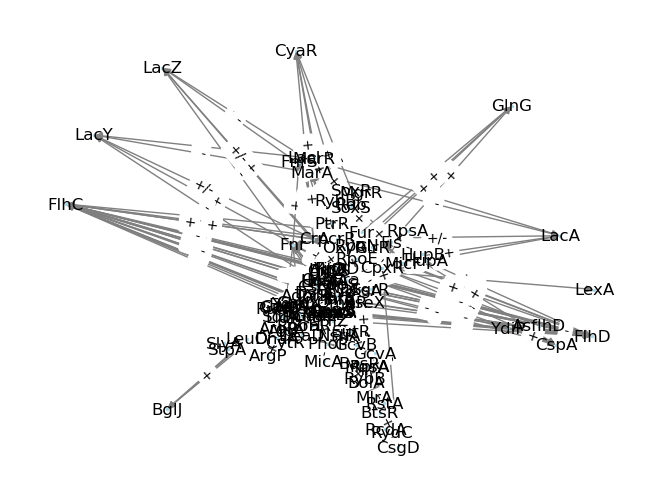

Parameter values before passing to create_dataframes_for_sergio_inputs_from_one_replica: {b_AlpA: 1.6990999432988017, b_GlnG: 0, b_RcsB: 0, b_GadX: 0, b_RstA: 0, b_RybB: 0, b_LexA: 0, b_FnrS: 0, b_FliZ: 0, b_MicA: 0, b_RpsA: 0, b_EvgA: 0, b_HupB: 0, b_RpoH: 0, b_CsgD: 0, b_RcsA: 0, b_SoxR: 0, b_IhfB: 0, b_OxyR: 0, b_BasR: 2.5177314151852532, b_YjjQ: 0, b_BolA: 0, b_OmrB: 0.36165473544753823, b_RpoD: 0, b_CsrA: 0, b_SgrS: 0, b_MatA: 0, b_DeaD: 0, b_MarR: 0, b_Fur: 0, b_RcdA: 0.7588641422646463, b_ArgR: 0, b_SgrR: 0, b_RpoS: 0, b_LrhA: 0, b_DsrA: 0, b_GlaR: 0.5962170814451919, b_McaS: 0, b_RprA: 0, b_HupA: 0, b_SoxS: 0, b_BglJ: 0, b_Hns: 0, b_NsrR: 0.6708011263227711, b_ArcA: 0.8571584644192181, b_RyhB: 0, b_RseX: 1.673826883173092, b_GadE: 0, b_MqsA: 0, b_YdeO: 0, b_SdiA: 0, b_BtsR: 0.31395979462302187, b_GcvB: 0, b_CyaR: 0, b_GadW: 0, b_Cra: 0, b_OxyS: 0, b_GlrR: 1.1403482018089124, b_CpxR: 0, b_OmpR: 0, b_AcrR: 0, b_PhoB: 0, b_OmrA: 1.9139455634980136, b_QseB: 0, b_DksA: 1.12737017897

In [65]:
# # Call the generate_sergio_single function with the graph and parameters
# generate_sergio_single(
#     target_gene="LacI",
#     gene_network=ecoli_network,
#     base_param_distributions=base_param_distributions,
#     targets_filename="LacI_all_ancestors_targets_1_bin.csv",
#     regs_filename="LacI_all_ancestors_regs_1_bin.csv",
#     seed=42,
#     draw_network_layout=True,  # Disable drawing for the test
#     network_filename="LacI_all_ancestors_graph_1_bin.graphml",
#     data_filename="LacI_all_ancestors_equations_1_bin.txt",
#     sergio_outname="LacI_all_ancestors_gene_expression_1_bin.csv",
# )

In [27]:
# Call the generate_sergio_data function with the test graph and parameters
generate_sergio_data(
    target_gene="lacI",
    gene_network=ecoli_network_no_small_rna,
    base_param_distributions=base_param_distributions,
    n_replicas=3,
    targets_filename="lacI_all_ancestors_targets_3_bins.csv",
    regs_filename="lacI_all_ancestors_regs_3_bins.csv",
    seed=42,
    draw_network_layout=False,  # Disable drawing for the test
    network_filename="lacI_all_ancestors_graph_3_bins.graphml",
    data_filename="lacI_all_ancestors_eqns_and_params_3_bins.txt",
    sergio_clean_outname="lacI_all_ancestors_eqns_and_params_3_bins_sergio_data_clean.csv",
    sergio_noise_outname="lacI_all_ancestors_eqns_and_params_3_bins_sergio_data_noise.csv",
    number_sc = 2000
)

/Users/geor228/Github/nocap/notebooks/ecoli/utility.py:294: UserWarning: using replica in range(N) - ensure replica id is 0 index.
  warnings.warn("using replica in range(N) - ensure replica id is 0 index.")


All parameter values dict: {0: {b_ompR: 0, b_lacA: 0, b_slyA: 0, b_sdiA: 0, b_zraR: 0, b_phoP: 0.3390550517706009, b_fur: 0, b_bglJ: 0, b_lldR: 0, b_rutR: 0, b_sutR: 0, b_rpoH: 0, b_marR: 0, b_hdfR: 0, b_torR: 0, b_mqsA: 0, b_rpoN: 0, b_gadE: 0, b_matA: 0, b_cspA: 0, b_nac: 0, b_rcsB: 0, b_rstA: 0, b_rpoS: 0, b_rob: 0, b_nsrR: 1.4317151711358436, b_mlrA: 0, b_flhD: 0, b_leuO: 0, b_cytR: 0, b_lacI: 0, b_qseB: 0, b_rpoD: 0, b_oxyR: 0, b_dksA: 0, b_cpxR: 0, b_evgA: 0, b_dnaA: 0, b_marA: 0, b_lacZ: 0, b_glaR: 1.0932830958015296, b_arcA: 0, b_cra: 0, b_rpoE: 0, b_csrA: 0, b_basR: 0.5375045643794011, b_gadX: 0, b_argP: 0, b_fnr: 0, b_hns: 0, b_fliZ: 0, b_argR: 0, b_ihfA: 0, b_lrp: 0, b_yjjQ: 0, b_bolA: 0, b_lacY: 0, b_fliA: 0, b_rcsA: 0, b_ihfB: 0, b_ydiP: 0, b_acrR: 0, b_crp: 0, b_rpsA: 0, b_csgD: 0, b_soxS: 0, b_glnG: 0, b_lexA: 1.4130194000192302, b_lrhA: 0, b_stpA: 0, b_soxR: 0, b_glrR: 0.5311604857310319, b_gadW: 0, b_btsR: 1.3057374737006722, b_deaD: 0, b_flhC: 0, b_alpA: 0.66324160503

### TyrR

In [28]:
# get subgraph for "TyrR"

# # Call the generate_sergio_single function with the graph and parameters
# generate_sergio_single(
#     target_gene="TyrR",
#     gene_network=ecoli_network,
#     base_param_distributions=base_param_distributions,
#     targets_filename="TyrR_all_ancestors_targets_1_bin.csv",
#     regs_filename="TyrR_all_ancestors_regs_1_bin.csv",
#     seed=42,
#     draw_network_layout=False,  # Disable drawing for the test
#     network_filename="TyrR_all_ancestors_graph_1_bin.graphml",
#     data_filename="TyrR_all_ancestors_equations_1_bin.txt",
#     sergio_outname="TyrR_all_ancestors_gene_expression_1_bin.csv",
# )

# generate_sergio_data(
#     target_gene="TyrR",
#     gene_network=ecoli_network,
#     base_param_distributions=base_param_distributions,
#     n_replicas=3,
#     targets_filename="TyrR_all_ancestors_targets_3_bins.csv",
#     regs_filename="TyrR_all_ancestors_regs_3_bins.csv",
#     seed=42,
#     draw_network_layout=False,  # Disable drawing for the test
#     network_filename="TyrR_all_ancestors_graph_3_bins.graphml",
#     data_filename="TyrR_all_ancestors_equations_3_bins.txt",
#     sergio_outname="TyrR_all_ancestors_gene_expression_3_bins.csv",
# )

generate_sergio_data(
    target_gene="tyrR",
    gene_network=ecoli_network_no_small_rna,
    base_param_distributions=base_param_distributions,
    n_replicas=3,
    targets_filename="tyrR_all_ancestors_targets_3_bins.csv",
    regs_filename="tyrR_all_ancestors_regs_3_bins.csv",
    seed=42,
    draw_network_layout=False,  # Disable drawing for the test
    network_filename="tyrR_all_ancestors_graph_3_bins.graphml",
    data_filename="tyrR_all_ancestors_eqns_and_params_3_bins.txt",
    sergio_clean_outname="tyrR_all_ancestors_eqns_and_params_3_bins_sergio_data_clean.csv",
    sergio_noise_outname="tyrR_all_ancestors_eqns_and_params_3_bins_sergio_data_noise.csv",
    number_sc = 2000
)

/Users/geor228/Github/nocap/notebooks/ecoli/utility.py:294: UserWarning: using replica in range(N) - ensure replica id is 0 index.
  warnings.warn("using replica in range(N) - ensure replica id is 0 index.")


All parameter values dict: {0: {b_aroF: 0, b_folA: 0, b_yaiA: 0, b_ompR: 0, b_slyA: 0, b_sdiA: 0, b_zraR: 0, b_phoP: 0.8924873955959821, b_fur: 0, b_bglJ: 0, b_lldR: 0, b_rutR: 0, b_sutR: 0, b_rpoH: 0, b_hdfR: 0, b_torR: 0, b_mqsA: 0, b_rpoN: 0, b_gadE: 0, b_aroG: 0, b_matA: 0, b_cspA: 0, b_nac: 0, b_rcsB: 0, b_rstA: 0, b_rpoS: 0, b_nsrR: 1.0028760545770026, b_mlrA: 0, b_flhD: 0, b_leuO: 0, b_cytR: 0, b_qseB: 0, b_rpoD: 0, b_oxyR: 0, b_dksA: 0, b_cpxR: 0, b_evgA: 0, b_tyrR: 0, b_tyrP: 0, b_phoB: 0, b_dnaA: 0, b_hupB: 0, b_trpR: 0, b_mtr: 0, b_glaR: 0.5326429753938127, b_arcA: 0, b_cra: 0, b_rpoE: 0, b_csrA: 0, b_basR: 1.0799581224409502, b_gadX: 0, b_argP: 0, b_fnr: 0, b_hns: 0, b_fliZ: 0, b_aroL: 0, b_tyrB: 0, b_argR: 0, b_ihfA: 0, b_lrp: 0, b_yjjQ: 0, b_bolA: 0, b_fliA: 0, b_rcsA: 0, b_ydiP: 0, b_acrR: 0, b_crp: 0, b_rpsA: 0, b_csgD: 0, b_soxS: 0, b_glnG: 0, b_hupA: 0, b_tyrA: 0, b_lexA: 1.1635449844663206, b_lrhA: 0, b_stpA: 0, b_soxR: 0, b_glrR: 0.19339379098930334, b_aroP: 0, b_ga

### FadR

In [29]:
# get subgraph for "FadR"

# # Call the generate_sergio_single function with the graph and parameters
# generate_sergio_single(
#     target_gene="FadR",
#     gene_network=ecoli_network,
#     base_param_distributions=base_param_distributions,
#     targets_filename="FadR_all_ancestors_targets_1_bin.csv",
#     regs_filename="FadR_all_ancestors_regs_1_bin.csv",
#     seed=42,
#     draw_network_layout=False,  # Disable drawing for the test
#     network_filename="FadR_all_ancestors_graph_1_bin.graphml",
#     data_filename="FadR_all_ancestors_equations_1_bin.txt",
#     sergio_outname="FadR_all_ancestors_gene_expression_1_bin.csv",
# )

# generate_sergio_data(
#     target_gene="FadR",
#     gene_network=ecoli_network,
#     base_param_distributions=base_param_distributions,
#     n_replicas=3,
#     targets_filename="FadR_all_ancestors_targets_3_bins.csv",
#     regs_filename="FadR_all_ancestors_regs_3_bins.csv",
#     seed=42,
#     draw_network_layout=False,  # Disable drawing for the test
#     network_filename="FadR_all_ancestors_graph_3_bins.graphml",
#     data_filename="FadR_all_ancestors_equations_3_bins.txt",
#     sergio_outname="FadR_all_ancestors_gene_expression_3_bins.csv",
# )

generate_sergio_data(
    target_gene="fadR",
    gene_network=ecoli_network_no_small_rna,
    base_param_distributions=base_param_distributions,
    n_replicas=3,
    targets_filename="fadR_all_ancestors_targets_3_bins.csv",
    regs_filename="fadR_all_ancestors_regs_3_bins.csv",
    seed=42,
    draw_network_layout=False,  # Disable drawing for the test
    network_filename="fadR_all_ancestors_graph_3_bins.graphml",
    data_filename="fadR_all_ancestors_eqns_and_params_3_bins.txt",
    sergio_clean_outname="fadR_all_ancestors_eqns_and_params_3_bins_sergio_data_clean.csv",
    sergio_noise_outname="fadR_all_ancestors_eqns_and_params_3_bins_sergio_data_noise.csv",
    number_sc = 2000
)

/Users/geor228/Github/nocap/notebooks/ecoli/utility.py:294: UserWarning: using replica in range(N) - ensure replica id is 0 index.
  warnings.warn("using replica in range(N) - ensure replica id is 0 index.")


All parameter values dict: {0: {b_fadA: 0, b_ptrR: 2.17386721617813, b_ompR: 0, b_slyA: 0, b_sdiA: 0, b_zraR: 0, b_fadM: 0, b_aceK: 0, b_phoP: 0.3390550517706009, b_fur: 0, b_bglJ: 0, b_fadR: 0, b_lldR: 0, b_rutR: 0, b_sutR: 0, b_rpoH: 0, b_marR: 0, b_hdfR: 0, b_torR: 0, b_mqsA: 0, b_rpoN: 0, b_gadE: 0, b_fadH: 0, b_accD: 0, b_matA: 0, b_cspA: 0, b_fabI: 0, b_fadE: 0, b_fabD: 0, b_nac: 0, b_c0293: 1.4317151711358436, b_rcsB: 0, b_rstA: 0, b_rpoS: 0, b_fabG: 0, b_accA: 0, b_nsrR: 1.0932830958015296, b_rob: 0, b_mlrA: 0, b_fabH: 0, b_flhD: 0, b_leuO: 0, b_cytR: 0, b_qseB: 0, b_fadI: 0, b_rpoD: 0, b_oxyR: 0, b_hipA: 0, b_dksA: 0.5375045643794011, b_cpxR: 0, b_accC: 0, b_evgA: 0, b_fabR: 1.4130194000192302, b_phoB: 0, b_fadJ: 0, b_aceB: 0, b_dnaA: 0, b_accB: 0, b_marA: 0, b_fadD: 0, b_glaR: 0.5311604857310319, b_fabA: 0, b_arcA: 0, b_cra: 0, b_rpoE: 0, b_csrA: 0, b_basR: 1.3057374737006722, b_gadX: 0, b_argP: 0, b_fnr: 0, b_hns: 0, b_fliZ: 0, b_argR: 0, b_hipB: 0, b_ihfA: 0, b_lrp: 0, b_yj

In [30]:
from y0.graph import NxMixedGraph
np.random.seed(42)

laci_network = utility.get_subgraph_from_nodes(ecoli_network_no_small_rna, ['lacI'], descendants_only=False)
laci_network_dag = utility.convert_to_acyclic_graph_fancy(laci_network, 'lacI')
print(len(laci_network_dag.nodes))

fadr_network = utility.get_subgraph_from_nodes(ecoli_network_no_small_rna, ['fadR'], descendants_only=False)
fadr_network_dag = utility.convert_to_acyclic_graph_fancy(fadr_network, 'fadR')
print(len(fadr_network_dag.nodes))

tyrr_network = utility.get_subgraph_from_nodes(ecoli_network_no_small_rna, ['tyrR'], descendants_only=False)
tyrr_network_dag = utility.convert_to_acyclic_graph_fancy(tyrr_network, 'tyrR')
print(len(tyrr_network_dag.nodes))

laci_nmg = NxMixedGraph.from_str_edges(directed=list(laci_network_dag.edges()))
fadr_nmg = NxMixedGraph.from_str_edges(directed=list(fadr_network_dag.edges()))
tyrr_nmg = NxMixedGraph.from_str_edges(directed=list(tyrr_network_dag.edges()))

83
109
92


In [5]:
import random

ex_edge_list = [('V1', 'V2'), ('V1', 'V4'), ('V2', 'V5'), ('V4', 'V5'), ('V4', 'V6'), ('V5', 'V6'), ('V3', 'V5')]
ex_graph = nx.DiGraph(ex_edge_list) 
for edge in ex_graph.edges():
    ex_graph.edges[edge]['polarity'] = random.choice(['+', '-'])
assert(nx.is_directed_acyclic_graph(ex_graph))


base_param_distributions1 = {
    "K": {"min": 1, "max": 5},
    "n": {"min": 1, "max": 3},
    "h": {"min": 1, "max": 5},
    "b": {"a": 2, "b": 5, "scale": 4},
}
base_param_distributions2 = {
    "K": {"min": 1, "max": 5},
    "n": {"min": 1, "max": 3},
    "h": {"min": 1, "max": 5},
    "b": {"a": 2, "b": 5, "scale": 400},
}

base_param_distributions = {
    0: base_param_distributions1,
    1: base_param_distributions2,
#    2: base_param_distributions3
}


base_param_distributions=base_param_distributions
n_replicas=2
targets_filename="example_targets_2_bins.csv"
regs_filename="example_2_bins.csv"
seed=42
draw_network_layout=False  # Disable drawing for the test
network_filename="example_2_bins_graph.graphml"
data_filename="example_2_bins_eqns_and_params.txt"
sergio_clean_outname="example_2_bins_sergio_data_clean.csv"
sergio_noise_outname="example_2_bins_sergio_data_noise.csv"
number_sc = 2000

# Set the random seed
np.random.seed(seed)

# Get subgraph for the target gene
#network_all = utility.get_subgraph_from_nodes(gene_network, [target_gene], descendants_only=False)
network_dag = ex_graph #utility.convert_to_acyclic_graph_fancy(network_all, target_gene)
assert network_dag
# Optionally draw the network
if draw_network_layout:
    utility.draw_network(network_dag)
# Optionally save the network to a file
if network_filename is not None:
    nx.write_gml(network_dag, f"{network_filename}")

# Define distribution settings for the parameters
param_distributions = base_param_distributions.copy()
master_regulators = [node for node, indegree in network_dag.in_degree() if indegree == 0]
print(master_regulators)
for replica_id, param_dist in param_distributions.items():
    param_dist["master_regulators"]= master_regulators

#param_distributions["master_regulators"] = master_regulators

# Generate hill equations and random parameter values from distribution
all_replica_equations = utility.generate_hill_equations_for_n_replicas(
    network_dag, activation_probability=0.5, N=n_replicas
)
all_parameter_values = utility.assign_random_values_for_n_replicas(
    all_replica_equations, param_distributions
)
print("All parameter values dict:", all_parameter_values)

if data_filename is not None:
    utility.write_equation_info_to_file(all_replica_equations, all_parameter_values, data_filename)

# Convert to SERGIO compatible data and save to file
node_to_idx = utility.create_node_to_idx_mapping(network_dag)
print(node_to_idx)
idx_to_node = {v: k for k, v in node_to_idx.items()}
print(idx_to_node)
# Adjust the keys in all_parameter_values to start from 1 if necessary
all_targets_dfs, all_regs_dfs = utility.create_dataframes_for_sergio_inputs_from_n_replicas(
    network_dag, all_parameter_values, node_to_idx
)
targets_df, regs_df = utility.merge_n_replica_dataframes_for_sergio_inputs(
    all_targets_dfs, all_regs_dfs, merge_type="first_only"
)
utility.write_input_files_for_sergio(targets_df, regs_df, targets_filename, regs_filename)
mapping = idx_to_node
# Validate SERGIO inputs
df_clean, df_noise = simulate_SERGIO(number_genes=len(network_dag.nodes()),
                number_bins=n_replicas,
                targets_file=targets_filename,
                regs_file=regs_filename,
                mapping=mapping, 
                number_sc=number_sc)
df_clean.to_csv(sergio_clean_outname)
df_noise.to_csv(sergio_noise_outname)



['V1', 'V3']
All parameter values dict: {0: {b_V1: 1.4147066289342636, b_V2: 0, b_V4: 0, b_V5: 0, b_V6: 0, b_V3: 0.9942322643129572, K_V1_V2: 3.404460046972835, K_V1_V4: 3.832290311184182, K_V2_V5: 1.0823379771832098, K_V4_V5: 4.879639408647977, K_V4_V6: 4.329770563201687, K_V5_V6: 1.8493564427131046, K_V3_V5: 1.7272998688284025, n_V1_V2: 1, n_V1_V4: 1, n_V2_V5: 2, n_V4_V5: 2, n_V4_V6: 1, n_V5_V6: 1, n_V3_V5: 1, h_V1_V2: 3.0990986410335566, h_V1_V4: 2.599443886861022, h_V2_V5: 1.1866626528544617, h_V4_V5: 4.895022075365837, h_V4_V6: 1.931085361721217, h_V5_V6: 1.3624257381312832, h_V3_V5: 3.473544037332349}, 1: {b_V1: 115.19617163083151, b_V2: 0, b_V4: 0, b_V5: 0, b_V6: 0, b_V3: 38.39577416779216, K_V1_V2: 3.253152871382157, K_V1_V4: 2.5416660101596644, K_V2_V5: 1.0638650088808568, K_V4_V5: 1.923575302488596, K_V4_V6: 1.9641018641040469, K_V5_V6: 3.733054075301833, K_V3_V5: 3.4399866311304836, n_V1_V2: 3, n_V1_V4: 3, n_V2_V5: 2, n_V4_V5: 1, n_V4_V6: 2, n_V5_V6: 2, n_V3_V5: 2, h_V1_V2: 

/Users/geor228/Github/nocap/notebooks/ecoli/utility.py:294: UserWarning: using replica in range(N) - ensure replica id is 0 index.
  warnings.warn("using replica in range(N) - ensure replica id is 0 index.")


Done with current level
Start simulating new level
There are 3 genes to simulate in this layer
Done with current level
Start simulating new level
There are 1 genes to simulate in this layer
Done with current level
Start simulating new level
There are 1 genes to simulate in this layer
Done with current level
   0     1     2     3     4     5     6     7     8     9     ...  3990  \
0     0     0     0    49     0    42     0     0     0    53  ...    49   
1     0     0     0     0     0     0     0     0     0     0  ...     0   
2     0     0     0     0     0     0     0     0     0     0  ...     0   
3     0     0     0     0     0     0     0     0     0     0  ...     0   
4     0    39    60    36    34     0    31     0     0    40  ...     0   
5    74     0     0     0     0   107     0     0     0     0  ...     0   

   3991  3992  3993  3994  3995  3996  3997  3998  3999  
0   120   107    68    32    75    66    74    65   135  
1     0     0     0     0     0     0     

# Cytoscape visualization demo

In [30]:
import ipycytoscape


def draw_cytoscape_network(G):
    # Create a Cytoscape graph
    cyto_graph = ipycytoscape.CytoscapeWidget()

    # Calculate the positions of the nodes using the spring layout algorithm
    pos = nx.spring_layout(G)

    # Add nodes with labels and positions
    for node in G.nodes():
        cyto_node = ipycytoscape.Node(
            data={"id": node, "label": str(node)}, position={"x": pos[node][0], "y": pos[node][1]}
        )
        cyto_graph.graph.add_node(cyto_node)

    # Add edges with polarity attribute
    for edge in G.edges(data=True):
        source, target, data = edge
        cyto_edge = ipycytoscape.Edge(
            data={"source": source, "target": target, "polarity": data["polarity"]}
        )
        cyto_graph.graph.add_edge(cyto_edge)

    # Define a style for the edges
    edge_style = [
        {
            "selector": 'edge[polarity = "+"]',
            "style": {
                "line-color": "green",
                "curve-style": "bezier",
                "target-arrow-shape": "triangle",
                "target-arrow-color": "green",
            },
        },
        {
            "selector": 'edge[polarity = "-"]',
            "style": {
                "line-color": "red",
                "curve-style": "bezier",
                "target-arrow-shape": "triangle",
                "target-arrow-color": "red",
            },
        },
        {
            "selector": 'edge[polarity = "+/-"]',
            "style": {
                "line-color": "black",
                "curve-style": "bezier",
                "target-arrow-shape": "triangle",
                "target-arrow-color": "black",
            },
        },
    ]

    # Define a style for the nodes to display the labels
    node_style = [{"selector": "node", "style": {"label": "data(label)"}}]

    # Apply the styles to the graph
    cyto_graph.set_style(edge_style + node_style)

    # Display the graph
    return cyto_graph


subgraph = get_subgraph_from_nodes(ecoli_network, ["TyrR"], descendants_only=False)
cyto_graph = draw_cytoscape_network(subgraph)

cyto_graph

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'edge[polarity = "+"]', 'styl…

# scratch

In [5]:
import pandas as pd

# Read the data into a DataFrame assuming that it's tab-delimited
file_path = "/Users/geor228/Github/nocap/notebooks/ecoli/All-instances-of-RNAs-in-Escherichia-coli-K-12-substr.-MG1655.txt"
df = pd.read_csv(file_path, sep="\t")

# Display the first few rows of the DataFrame to confirm it's loaded correctly
# print(df.head())

print(df["RNAs"])

0                                small RNA RyjA
1                     small regulatory RNA SdsN
2                     small regulatory RNA GadY
3                     small regulatory RNA ArrS
4                     small regulatory RNA PspH
                         ...                   
230       lysidine-modified tRNA<sup>ileX</sup>
231    e14 prophage; small regulatory RNA C0293
232                D-tyrosyl-tRNA<sup>Tyr</sup>
233              CP4-6 prophage; small RNA EyeA
234    <i>arfA</i>-derived small regulatory RNA
Name: RNAs, Length: 235, dtype: object
